# Capacity Factor
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from postreise.plot.analyze_pg import AnalyzePG as apg
from powersimdata.scenario.scenario import Scenario 

In [2]:
def do_yield_analysis(data, time, zones):
    resources = ['solar', 'wind']
    cf = apg(data, time, zones, resources, 'yield', normalize=False)
    cf.get_plot(save=False)
    data_cf = cf.get_data()
    print('----------------------------------------')
    for z in zones:
        print("Capacity factor in %s: " % z)
        for r in resources:
            if data_cf[z][r] is not None:
                print("%s: %.3f (pre-simulation) / %.3f (post-simulation)" % (r, data_cf[z][r][0], data_cf[z][r][1]))
        print('----------------------------------------')

## Scenario

In [3]:
scenario = Scenario("ca2020WestTarget")

SCENARIO: ca2045 | ca2020WestTarget

--> State
analyze
--> Loading ct
--> Loading Western interconnect
Loading zone
Loading sub
Loading bus2sub
Loading bus
Loading plant
Loading plant cost
Loading branch
Loading DC line


## Annual

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro
No solar plants in Montana Western
No solar plants in Wyoming


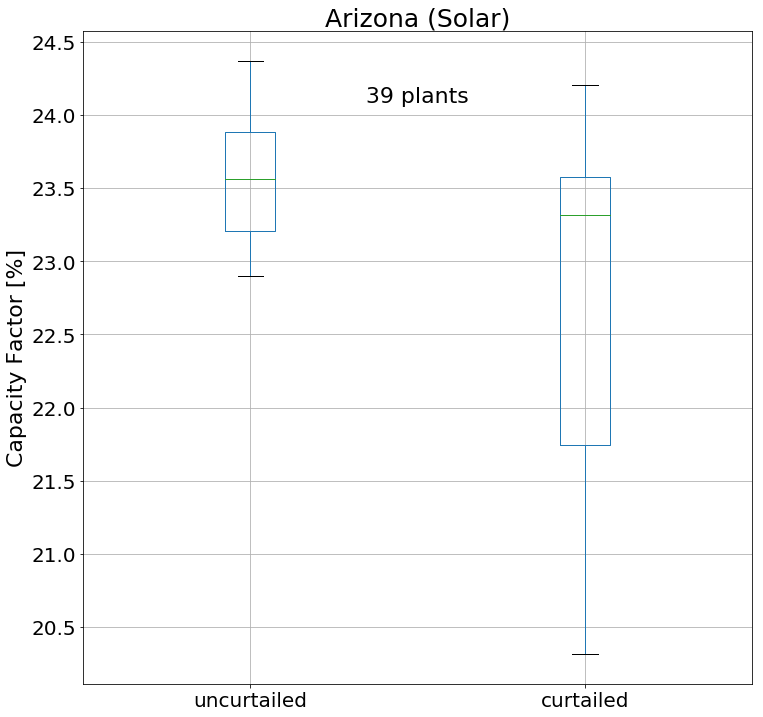

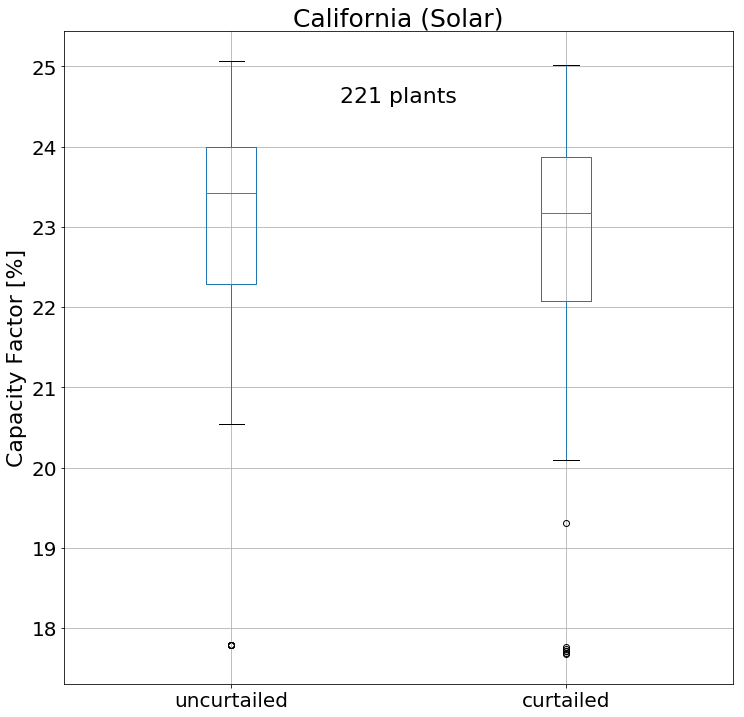

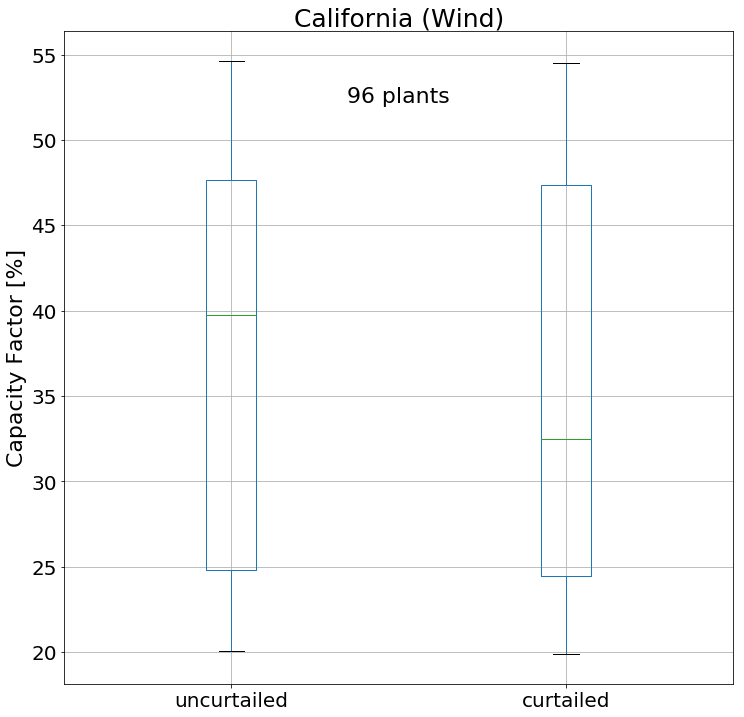

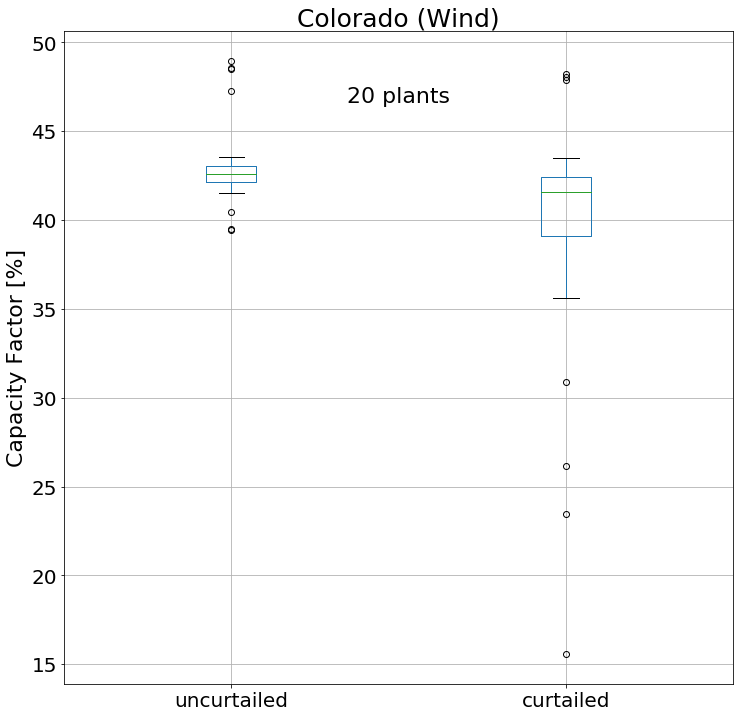

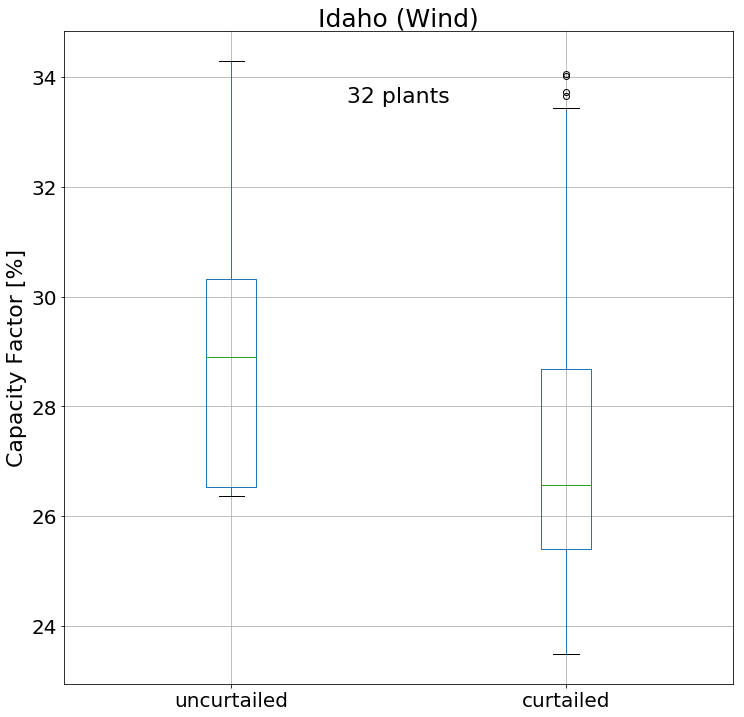

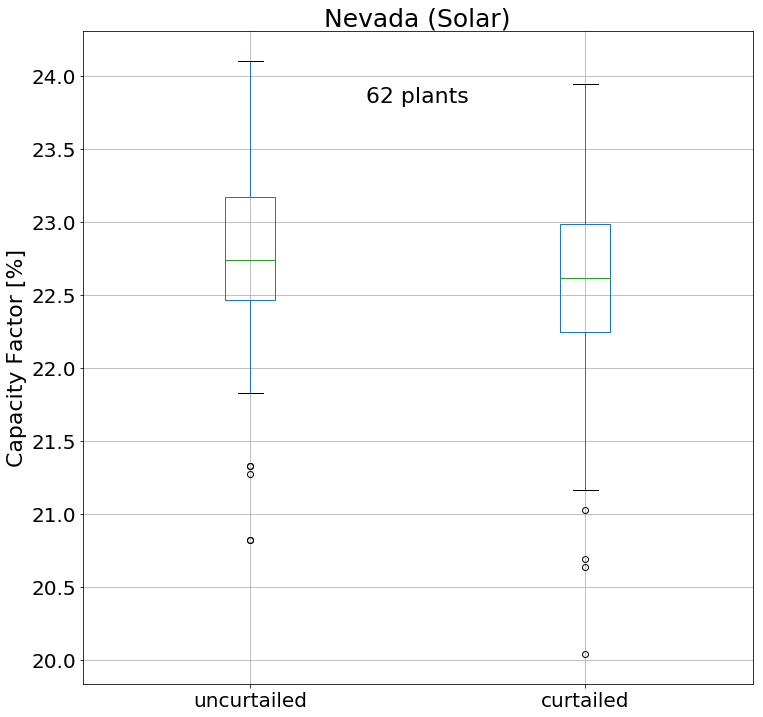

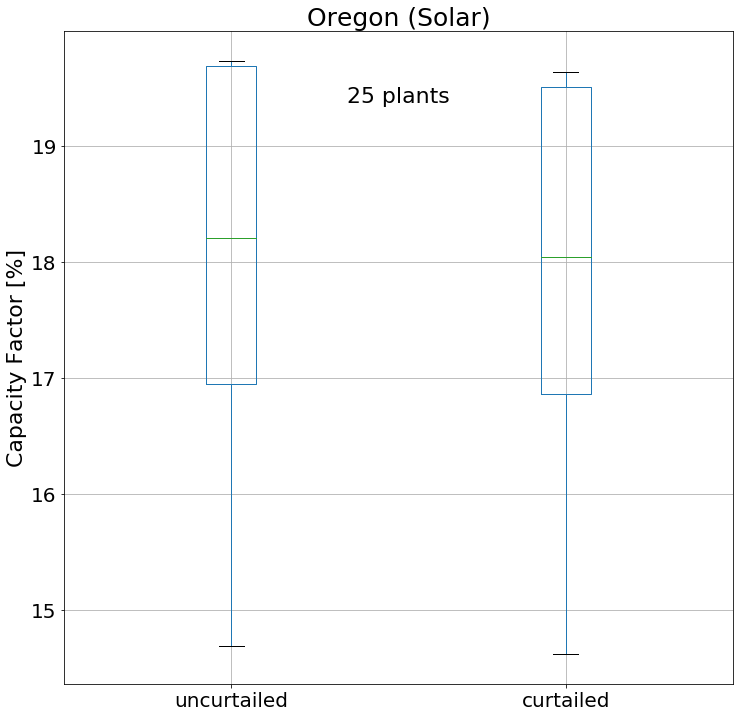

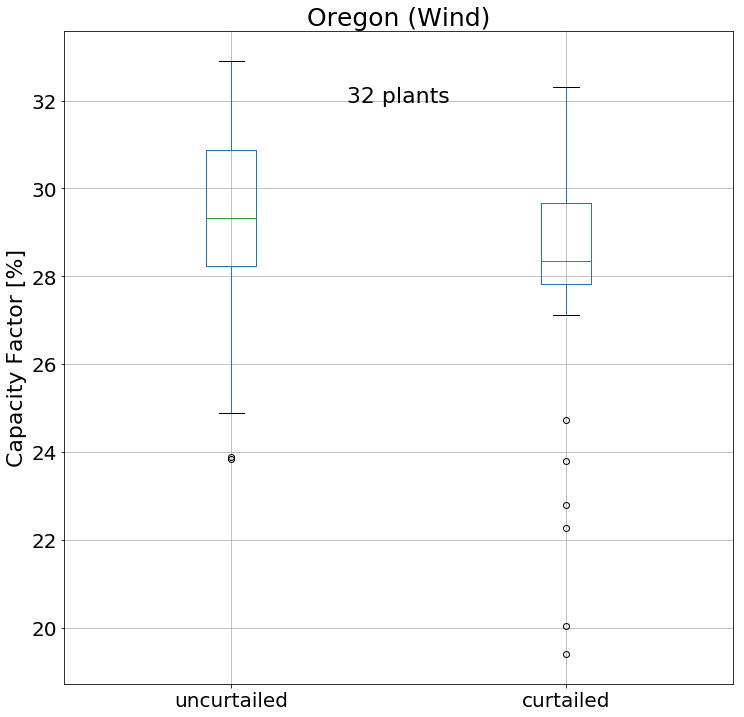

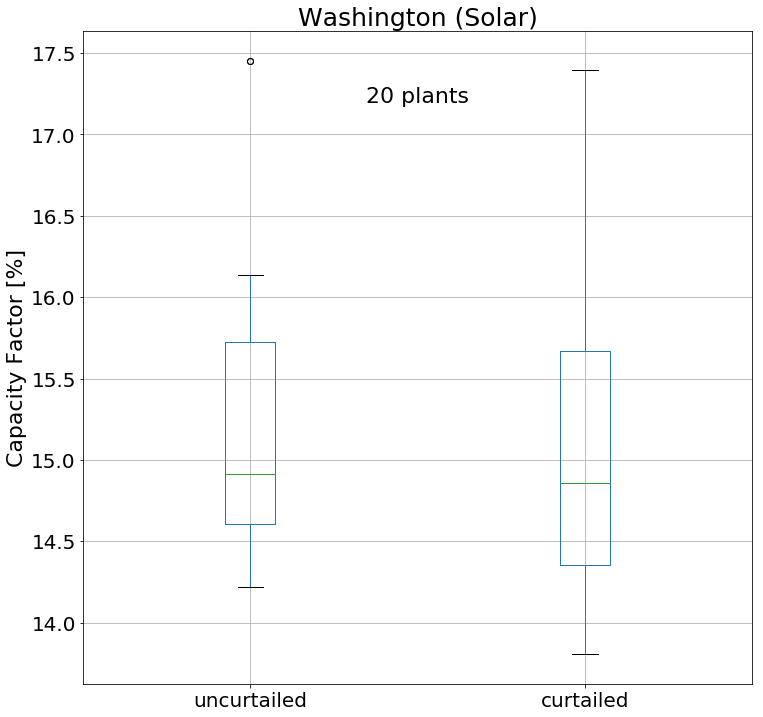

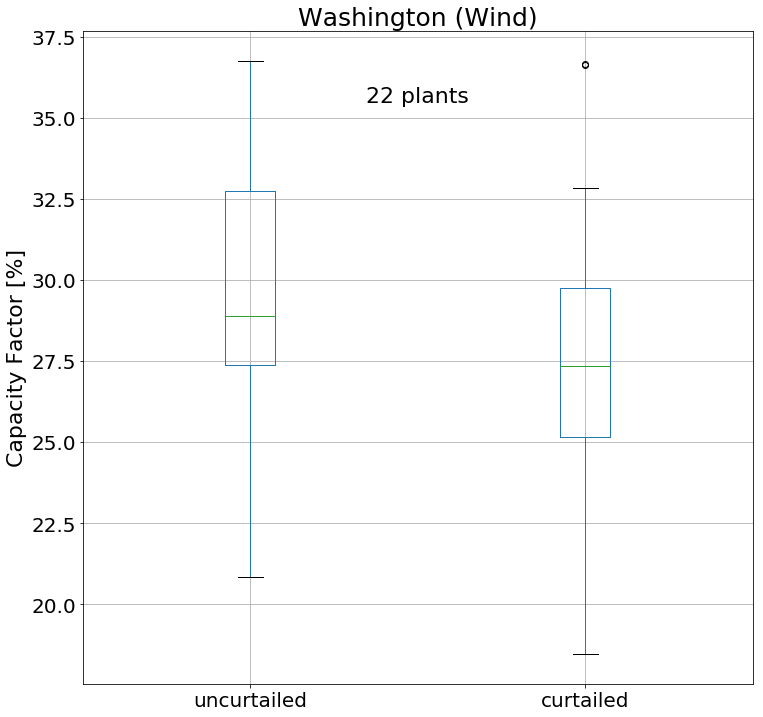

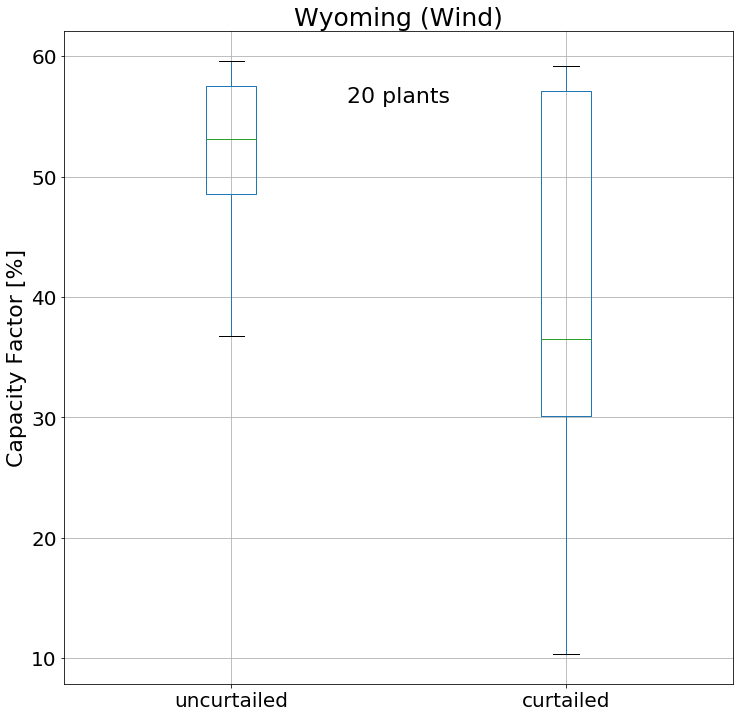

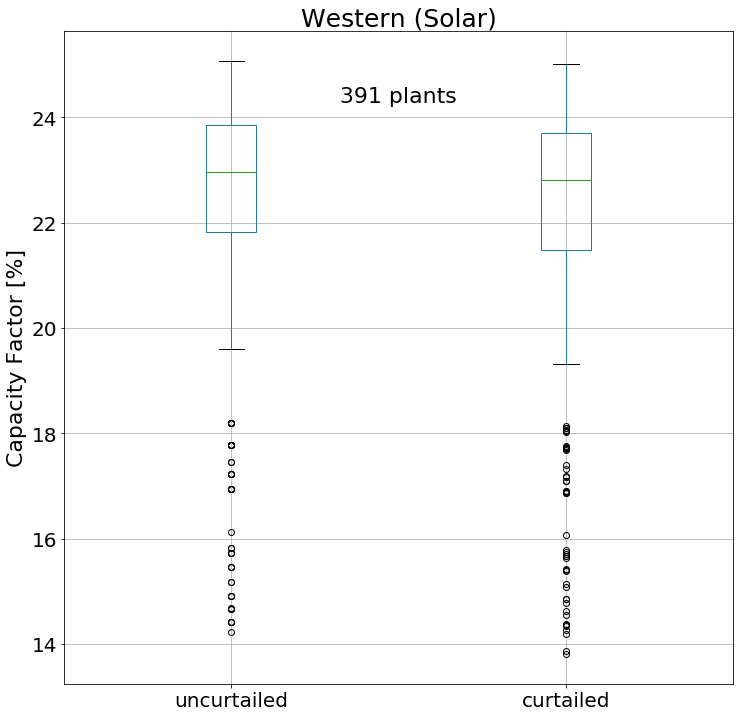

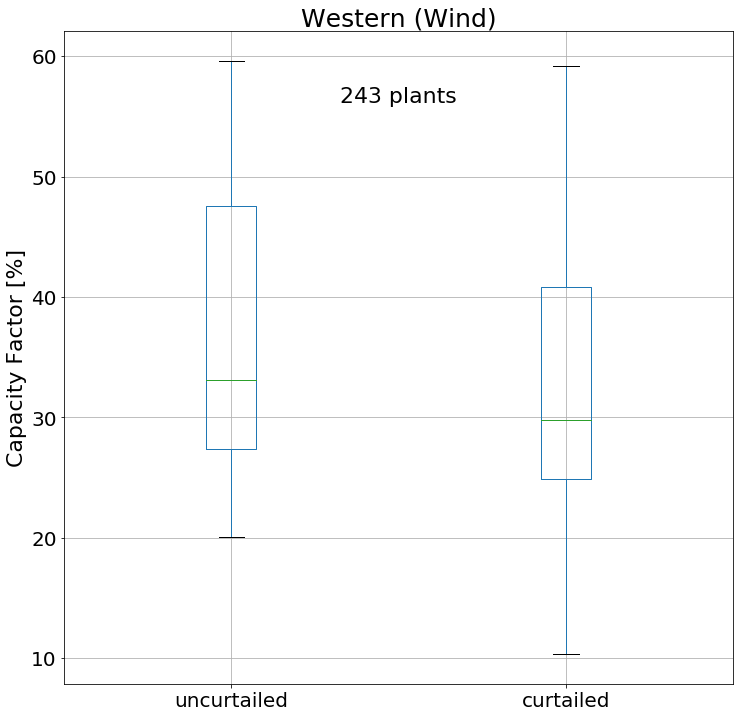

----------------------------------------
Capacity factor in Arizona: 
solar: 0.236 (pre-simulation) / 0.228 (post-simulation)
wind: 0.315 (pre-simulation) / 0.313 (post-simulation)
----------------------------------------
Capacity factor in California: 
solar: 0.231 (pre-simulation) / 0.229 (post-simulation)
wind: 0.371 (pre-simulation) / 0.349 (post-simulation)
----------------------------------------
Capacity factor in Colorado: 
solar: 0.229 (pre-simulation) / 0.228 (post-simulation)
wind: 0.433 (pre-simulation) / 0.388 (post-simulation)
----------------------------------------
Capacity factor in Idaho: 
solar: 0.180 (pre-simulation) / 0.179 (post-simulation)
wind: 0.291 (pre-simulation) / 0.277 (post-simulation)
----------------------------------------
Capacity factor in Montana Western: 
wind: 0.391 (pre-simulation) / 0.344 (post-simulation)
----------------------------------------
Capacity factor in Nevada: 
solar: 0.227 (pre-simulation) / 0.225 (post-simulation)
wind: 0.403 (pre

In [4]:
time = ('2016-01-01-00', '2016-12-31-23', 'utc', 'H')
zones = ['Arizona', 'California', 'Colorado', 'Idaho', 'Montana Western', 'Nevada',
         'New Mexico Western', 'Oregon', 'Utah', 'Washington', 'Wyoming', 'Western']
do_yield_analysis(scenario, time, zones)

## Winter

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro
No solar plants in Montana Western
No solar plants in Wyoming


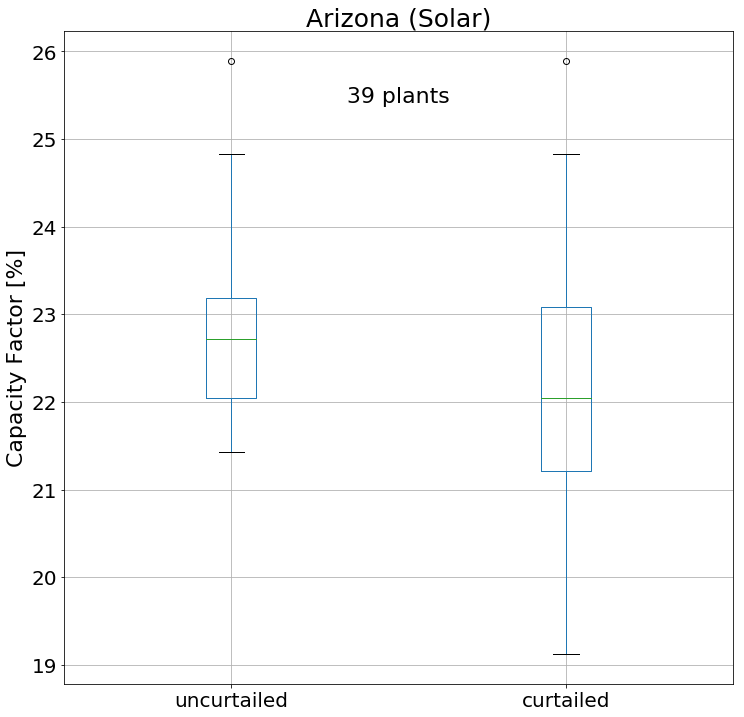

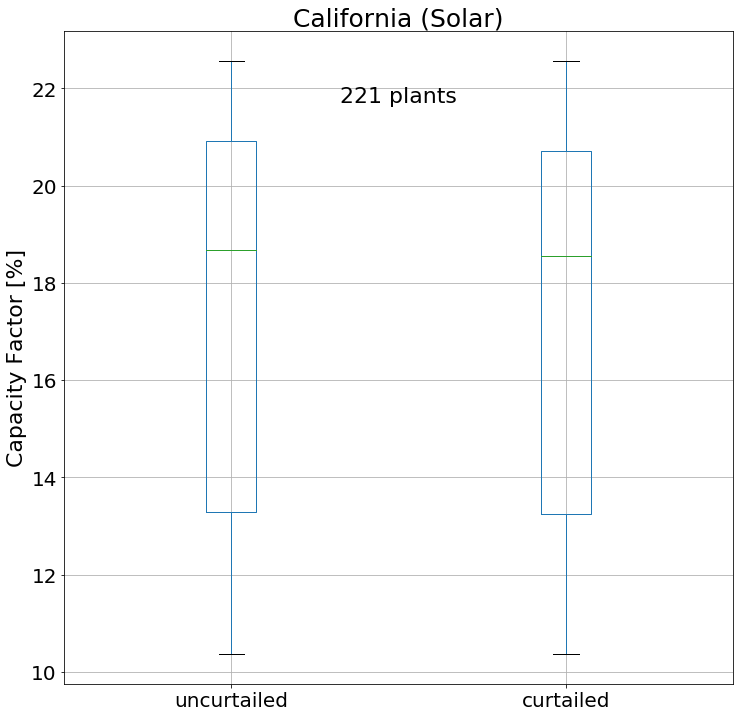

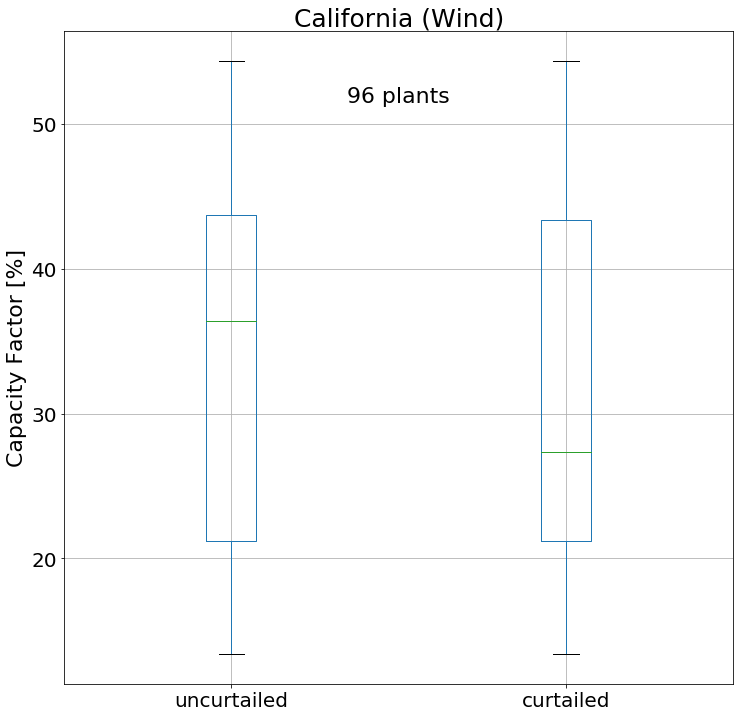

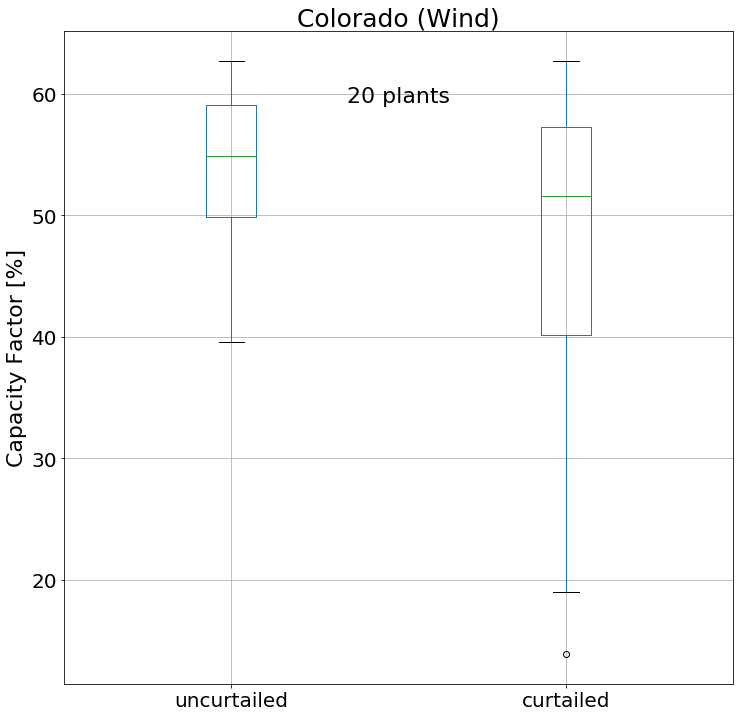

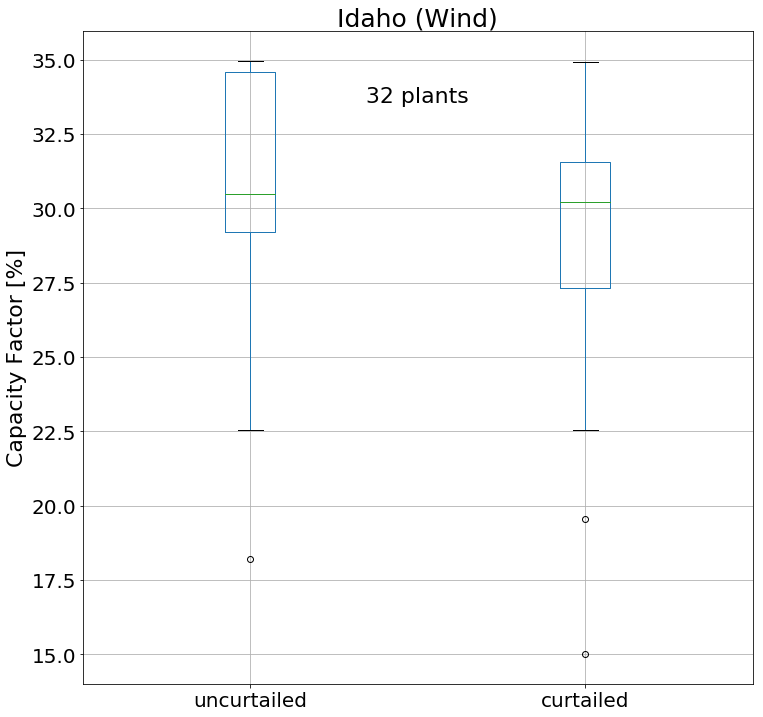

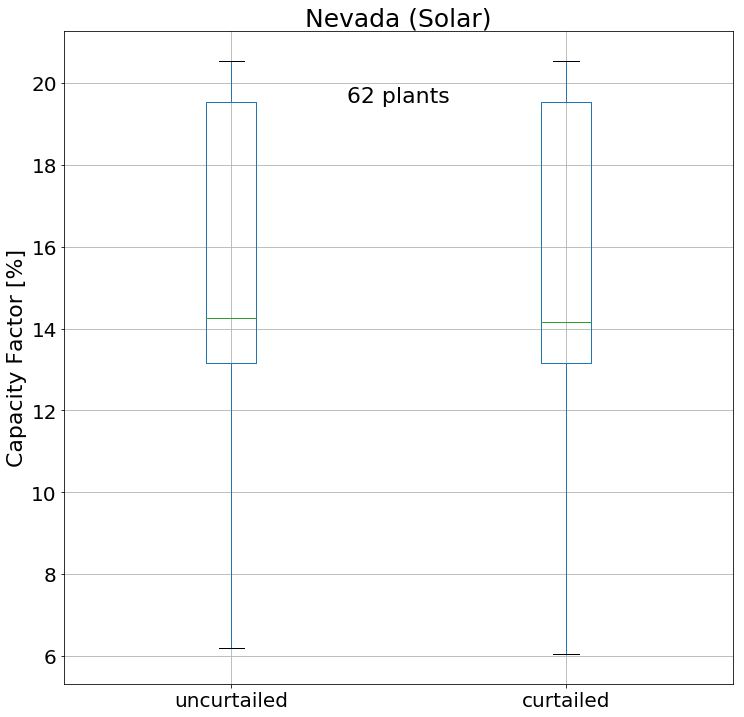

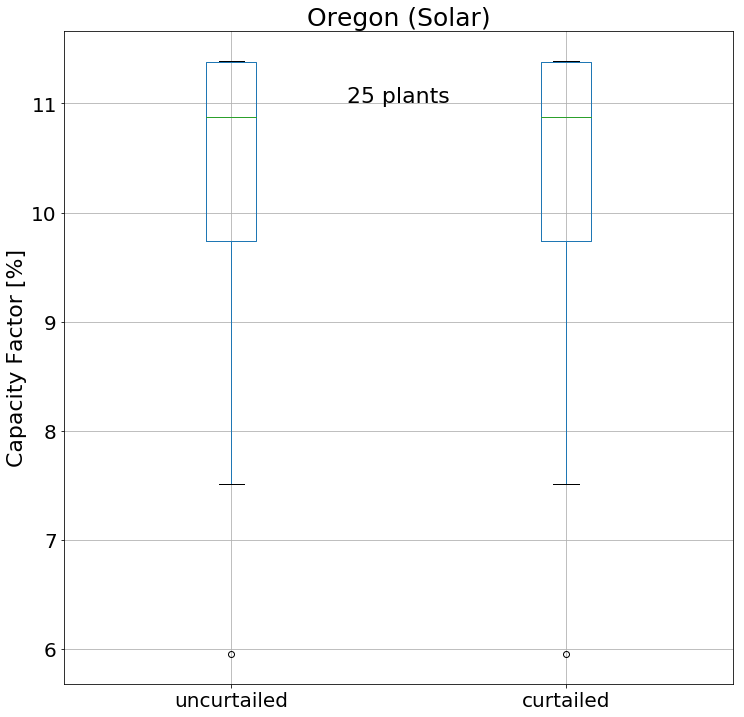

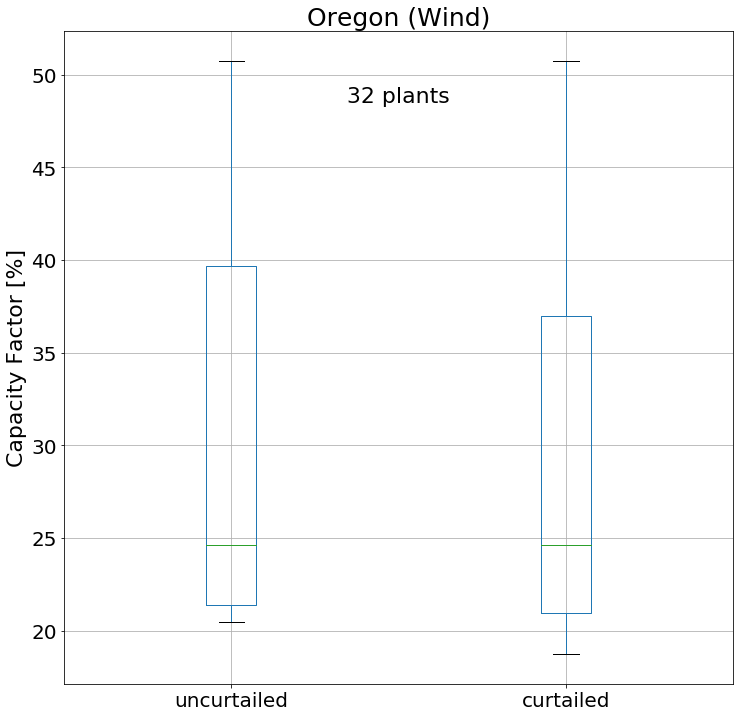

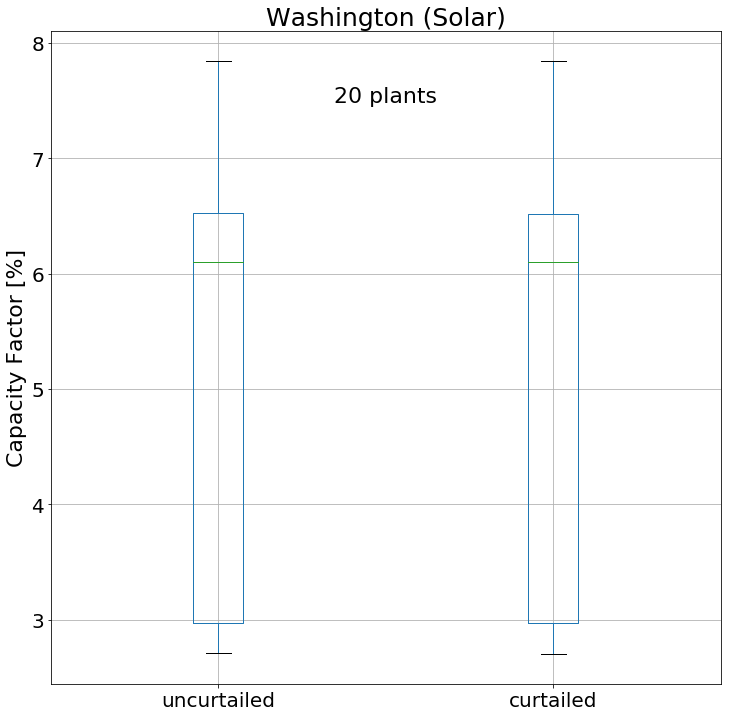

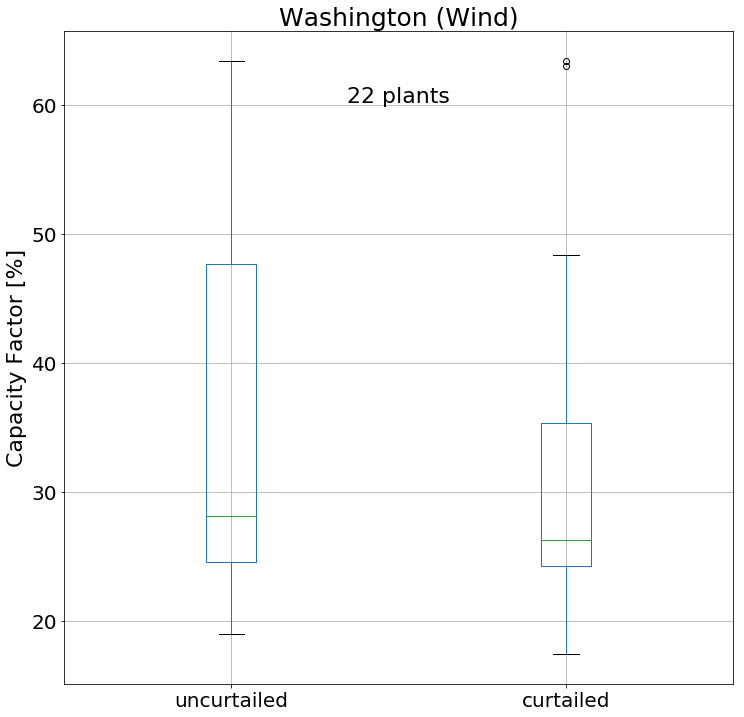

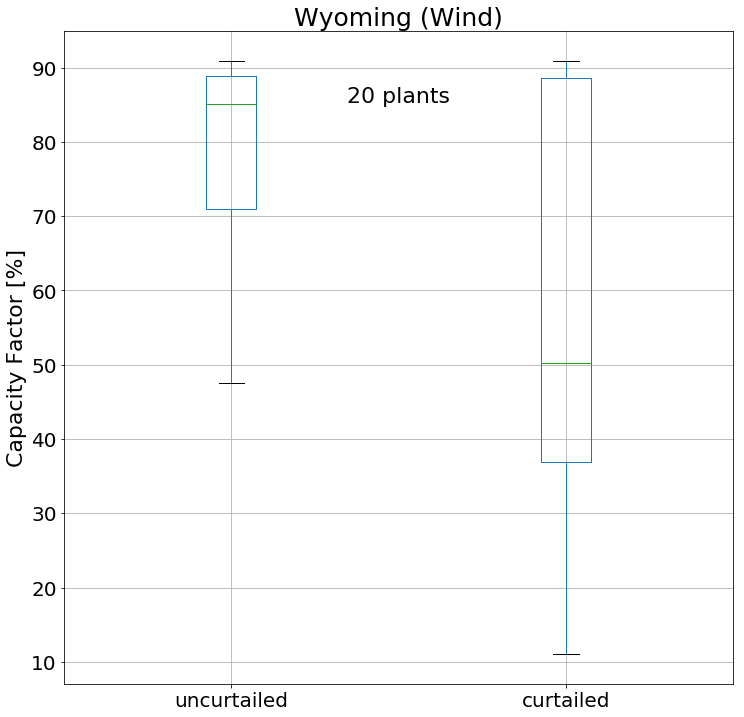

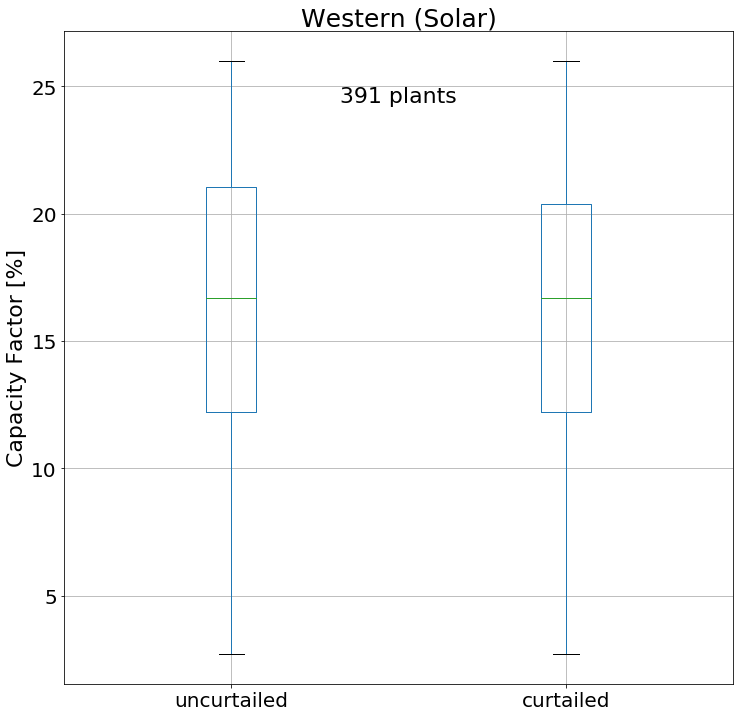

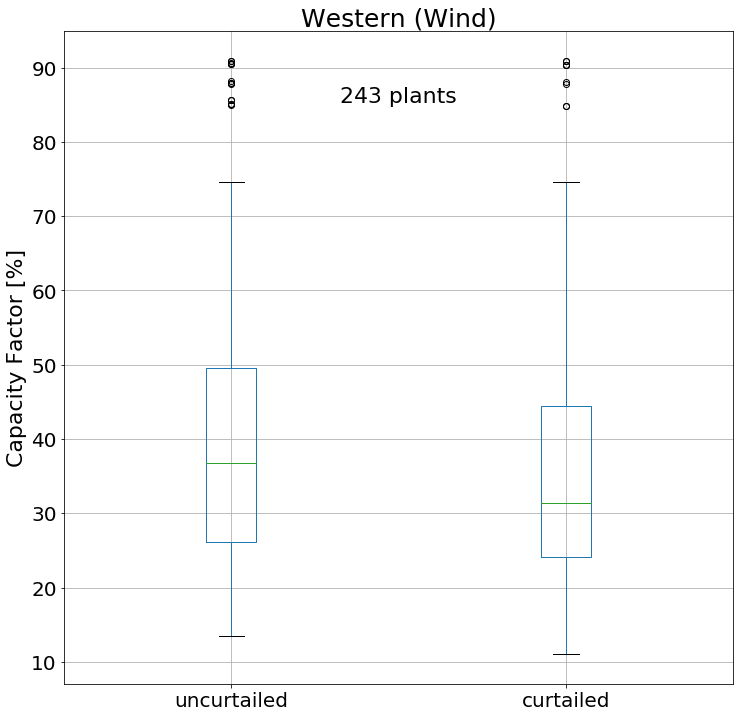

----------------------------------------
Capacity factor in Arizona: 
solar: 0.228 (pre-simulation) / 0.221 (post-simulation)
wind: 0.359 (pre-simulation) / 0.358 (post-simulation)
----------------------------------------
Capacity factor in California: 
solar: 0.172 (pre-simulation) / 0.171 (post-simulation)
wind: 0.340 (pre-simulation) / 0.318 (post-simulation)
----------------------------------------
Capacity factor in Colorado: 
solar: 0.141 (pre-simulation) / 0.141 (post-simulation)
wind: 0.531 (pre-simulation) / 0.470 (post-simulation)
----------------------------------------
Capacity factor in Idaho: 
solar: 0.087 (pre-simulation) / 0.087 (post-simulation)
wind: 0.301 (pre-simulation) / 0.292 (post-simulation)
----------------------------------------
Capacity factor in Montana Western: 
wind: 0.708 (pre-simulation) / 0.593 (post-simulation)
----------------------------------------
Capacity factor in Nevada: 
solar: 0.149 (pre-simulation) / 0.149 (post-simulation)
wind: 0.405 (pre

In [5]:
time = ('2016-01-21-00', '2016-01-31-23', 'utc', 'H')
zones = ['Arizona', 'California', 'Colorado', 'Idaho', 'Montana Western', 'Nevada',
         'New Mexico Western', 'Oregon', 'Utah', 'Washington', 'Wyoming', 'Western']
do_yield_analysis(scenario, time, zones)

## Spring

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro
No solar plants in Montana Western
No solar plants in Wyoming


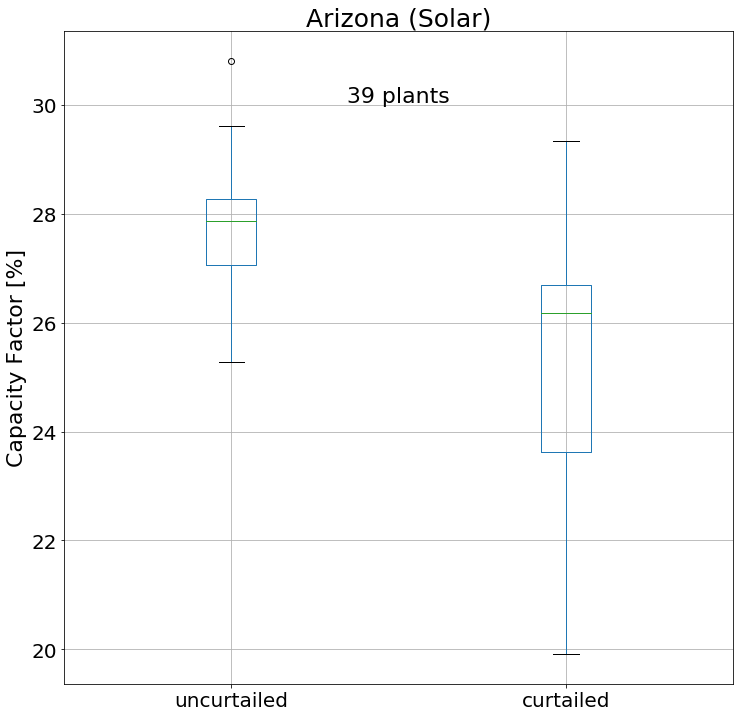

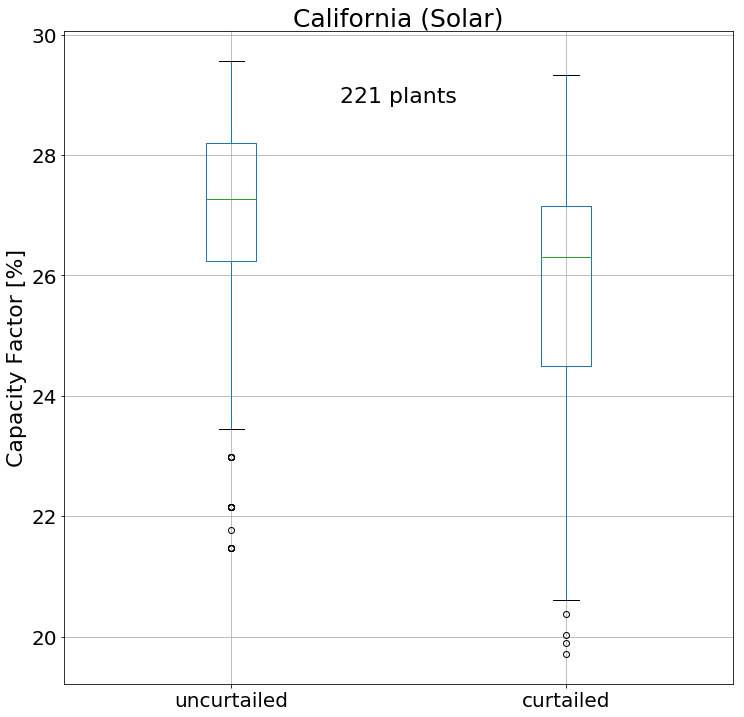

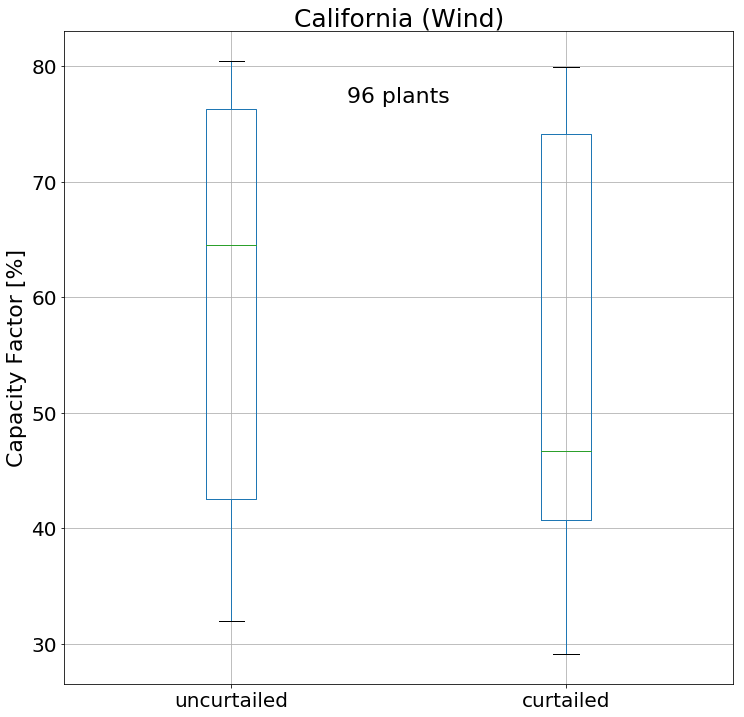

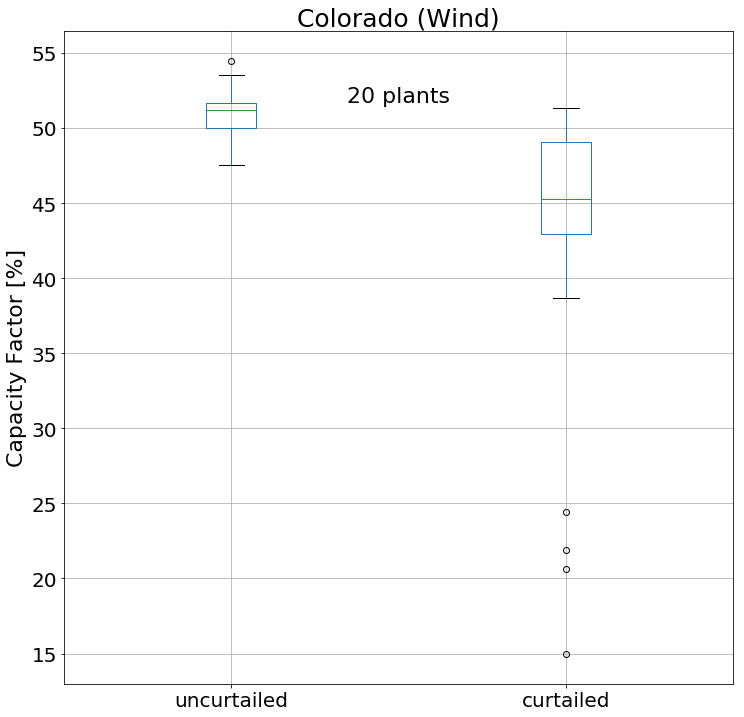

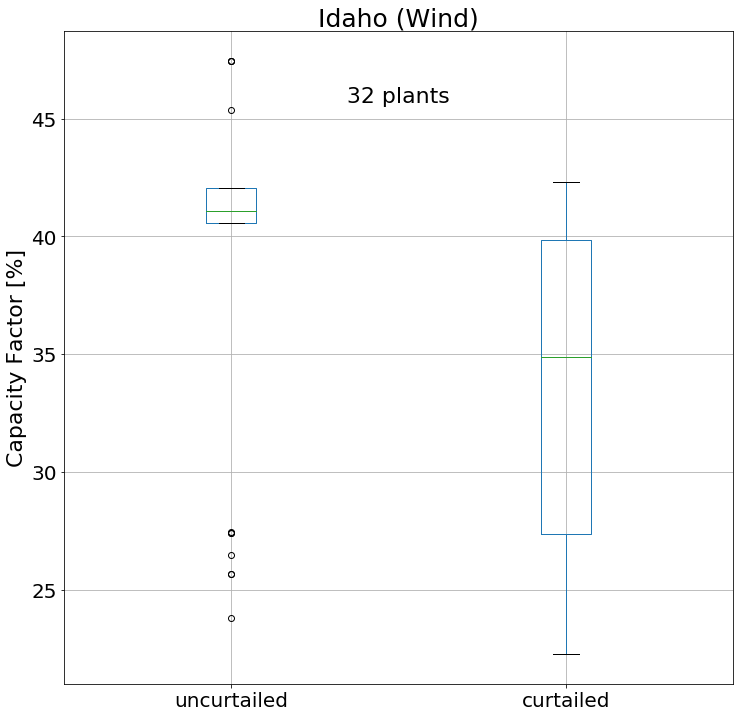

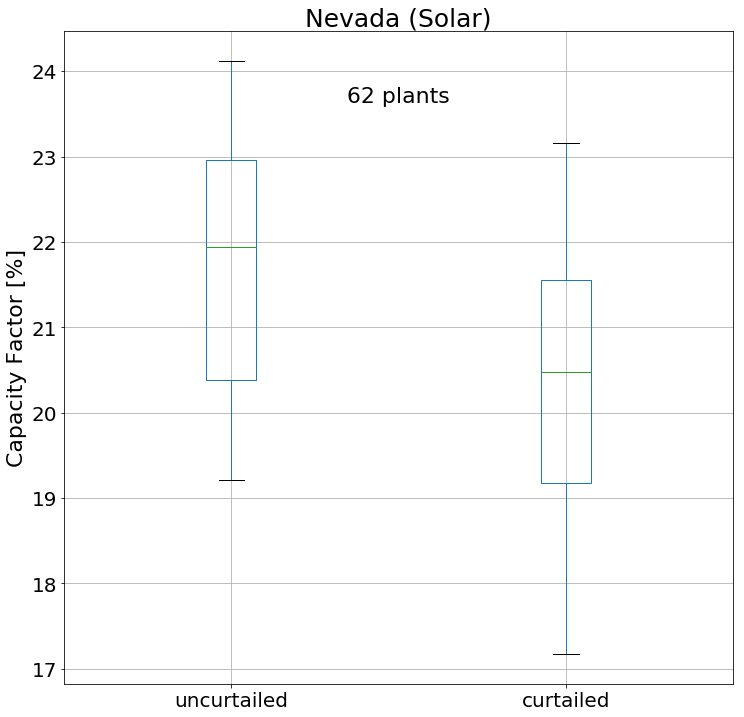

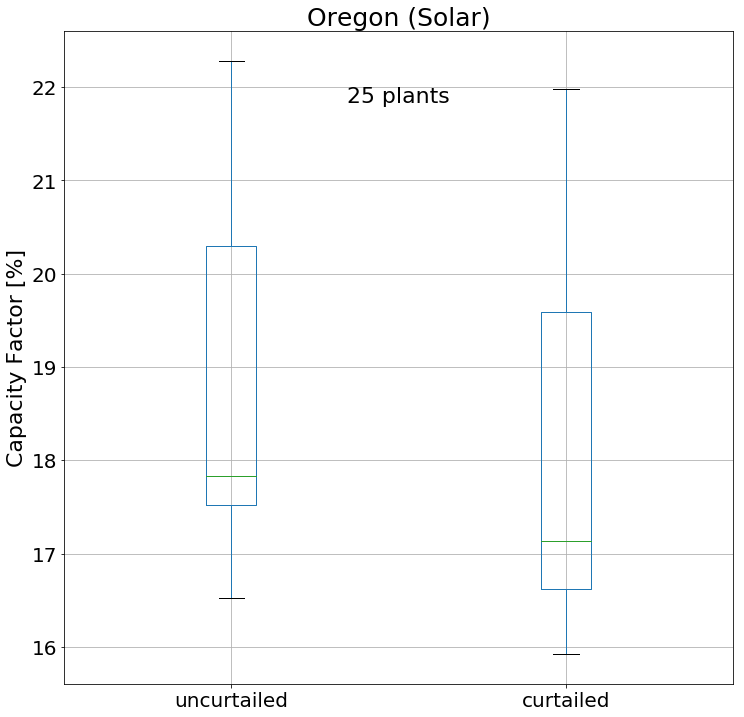

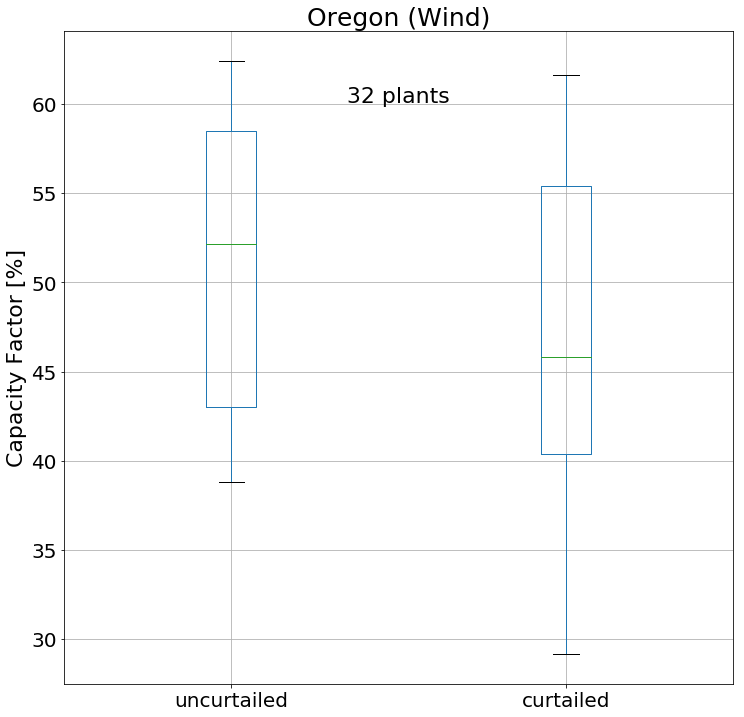

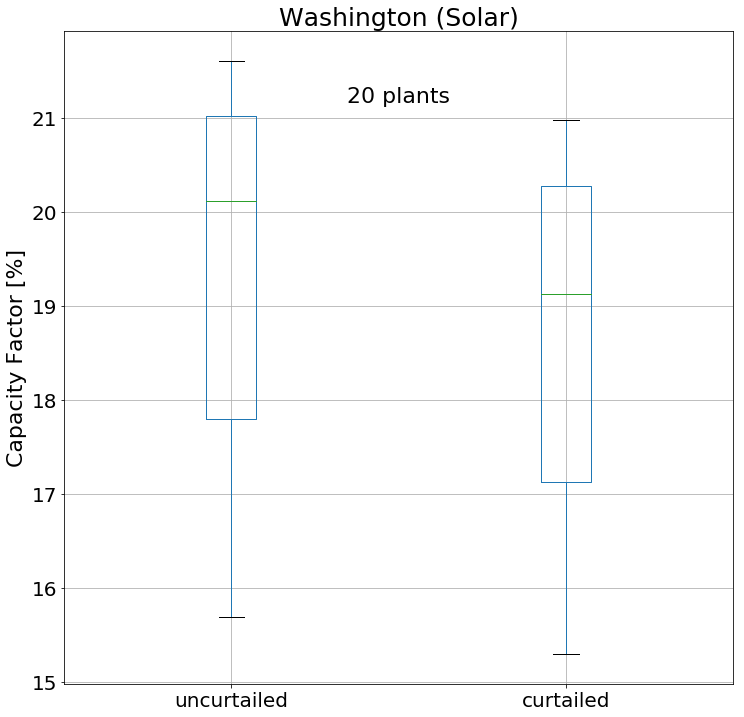

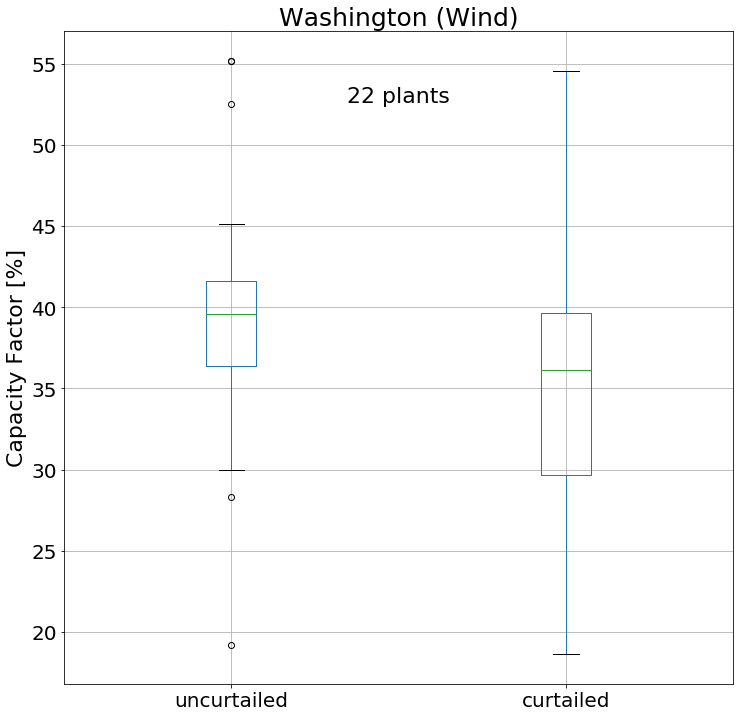

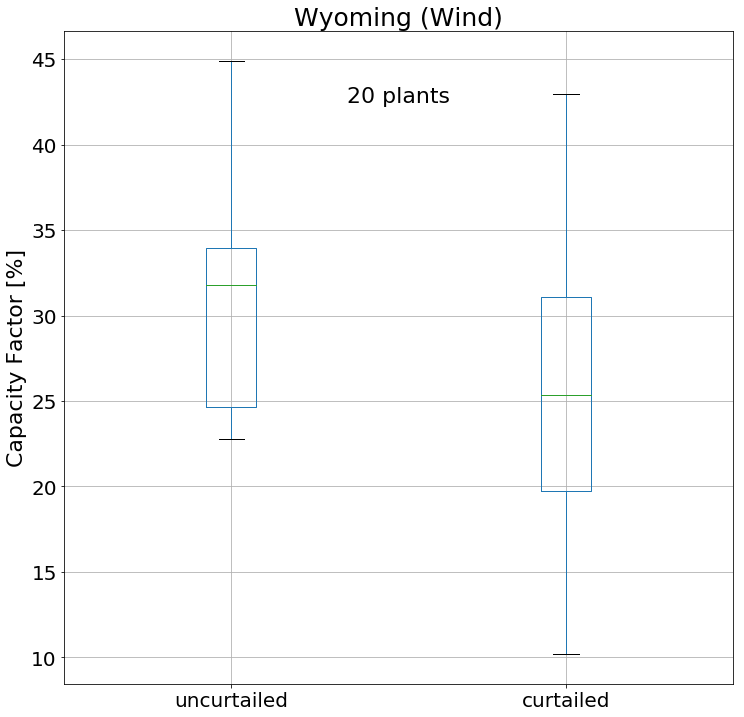

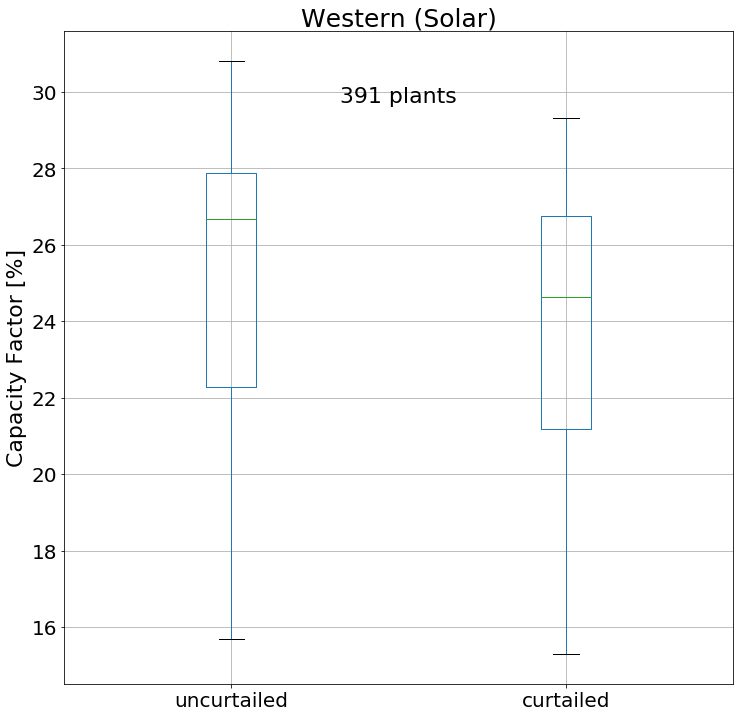

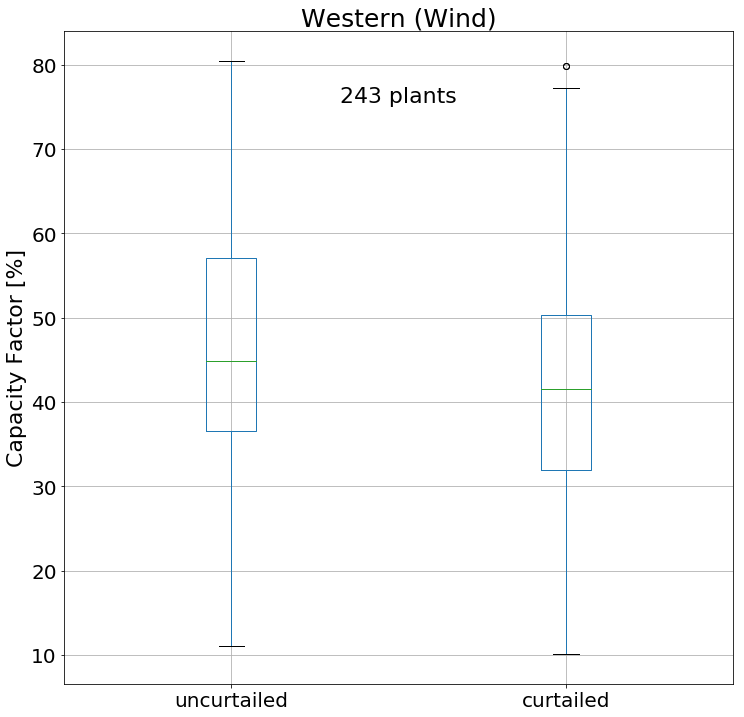

----------------------------------------
Capacity factor in Arizona: 
solar: 0.278 (pre-simulation) / 0.255 (post-simulation)
wind: 0.428 (pre-simulation) / 0.420 (post-simulation)
----------------------------------------
Capacity factor in California: 
solar: 0.268 (pre-simulation) / 0.257 (post-simulation)
wind: 0.592 (pre-simulation) / 0.543 (post-simulation)
----------------------------------------
Capacity factor in Colorado: 
solar: 0.250 (pre-simulation) / 0.236 (post-simulation)
wind: 0.509 (pre-simulation) / 0.419 (post-simulation)
----------------------------------------
Capacity factor in Idaho: 
solar: 0.196 (pre-simulation) / 0.187 (post-simulation)
wind: 0.388 (pre-simulation) / 0.333 (post-simulation)
----------------------------------------
Capacity factor in Montana Western: 
wind: 0.170 (pre-simulation) / 0.159 (post-simulation)
----------------------------------------
Capacity factor in Nevada: 
solar: 0.218 (pre-simulation) / 0.205 (post-simulation)
wind: 0.421 (pre

In [6]:
time = ('2016-04-21-00', '2016-04-30-23', 'utc', 'H')
zones = ['Arizona', 'California', 'Colorado', 'Idaho', 'Montana Western', 'Nevada',
         'New Mexico Western', 'Oregon', 'Utah', 'Washington', 'Wyoming', 'Western']
do_yield_analysis(scenario, time, zones)

## Summer

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro
No solar plants in Montana Western
No solar plants in Wyoming


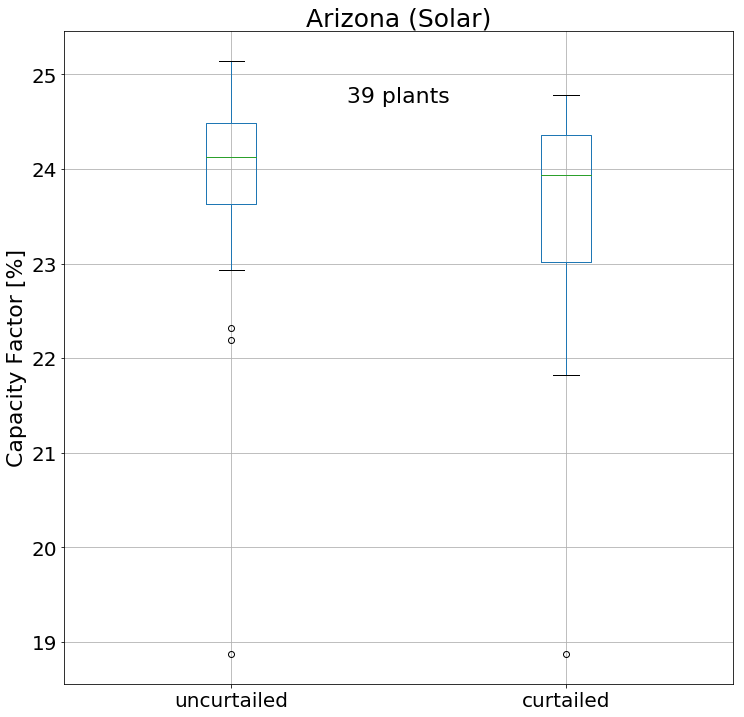

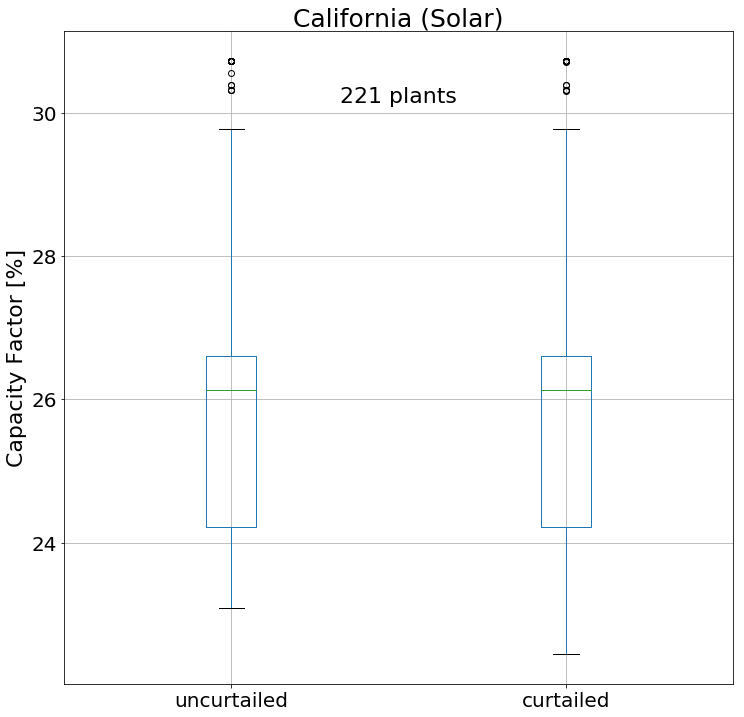

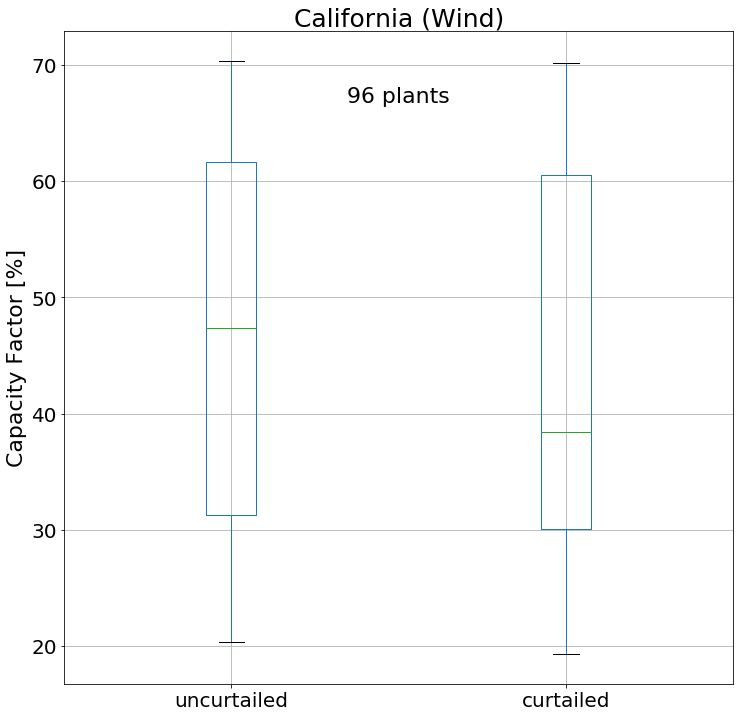

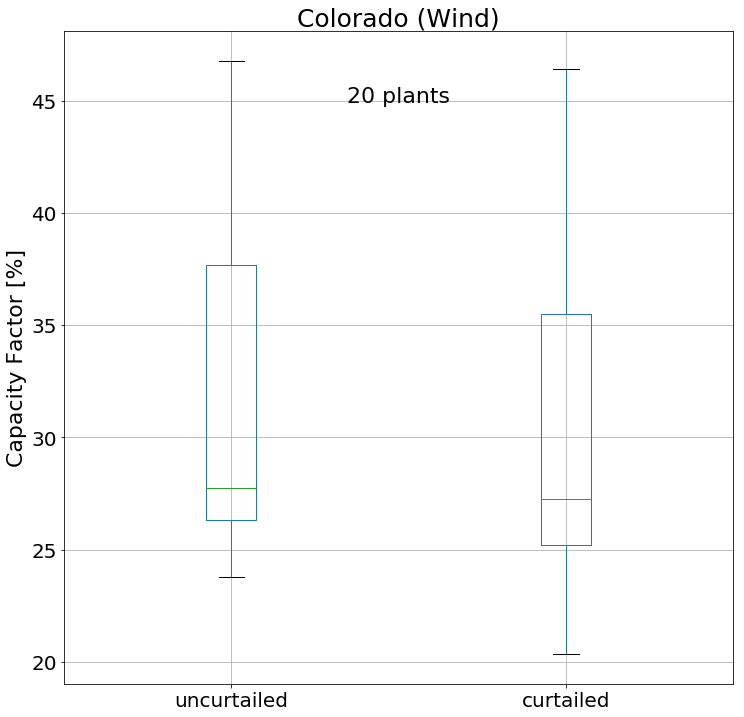

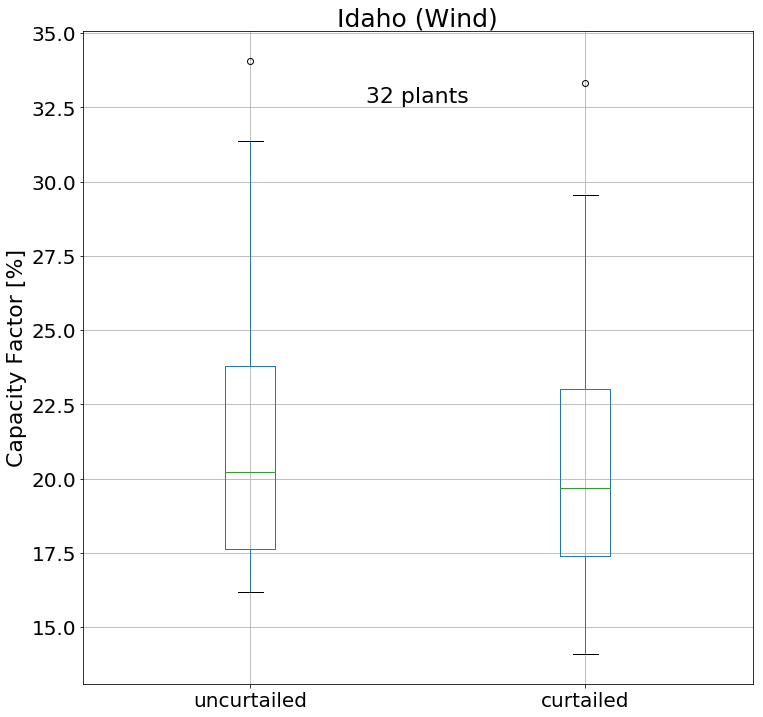

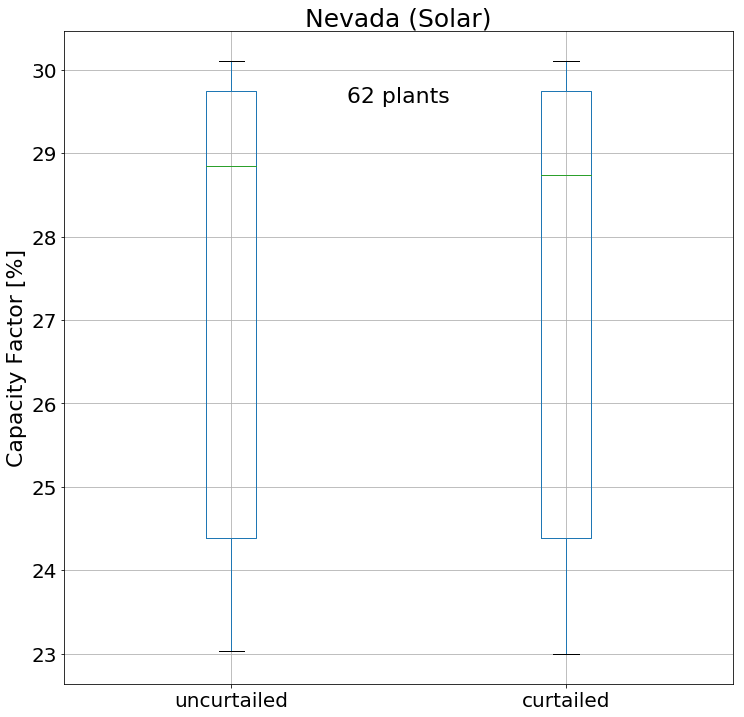

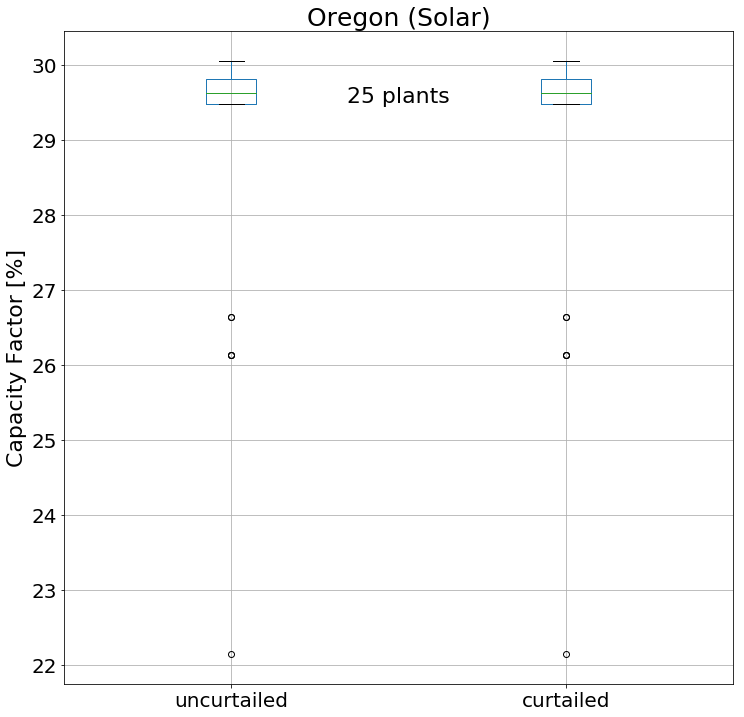

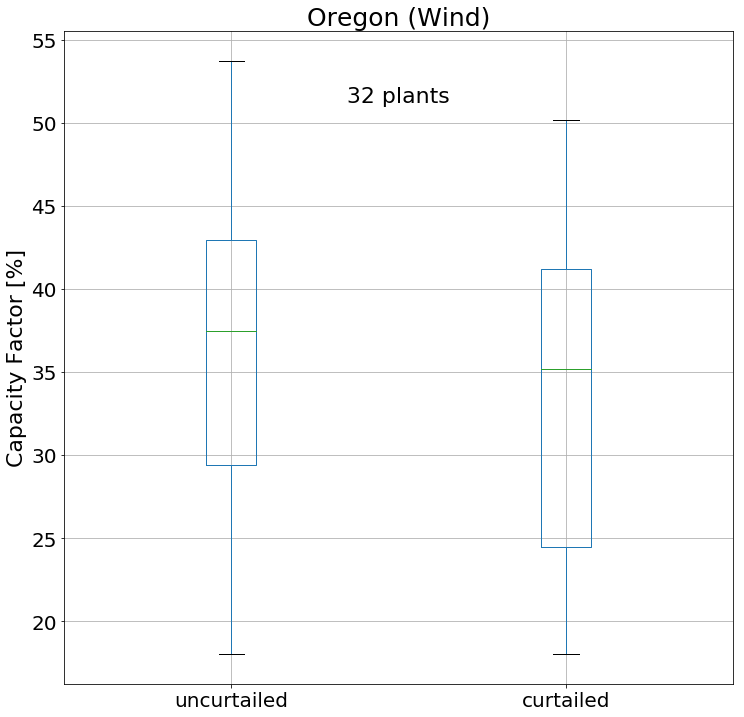

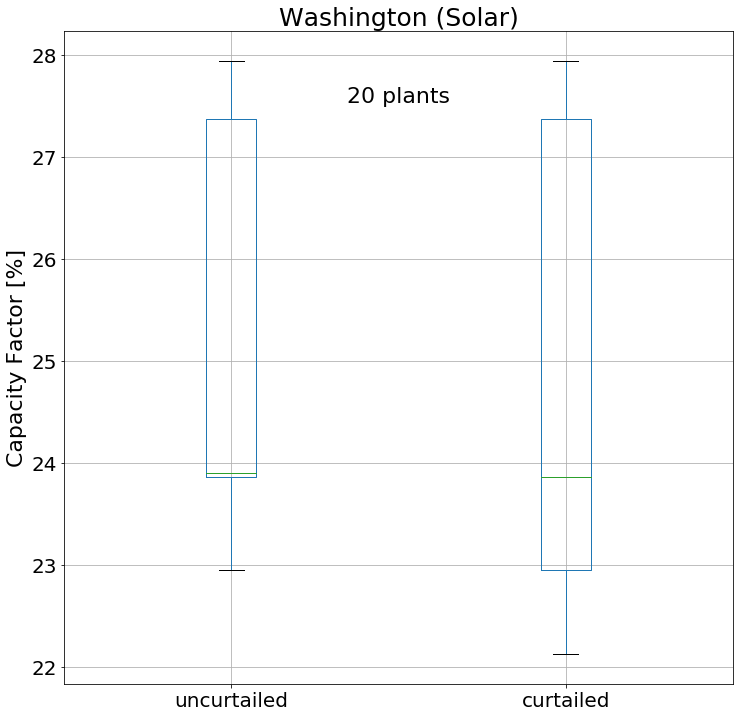

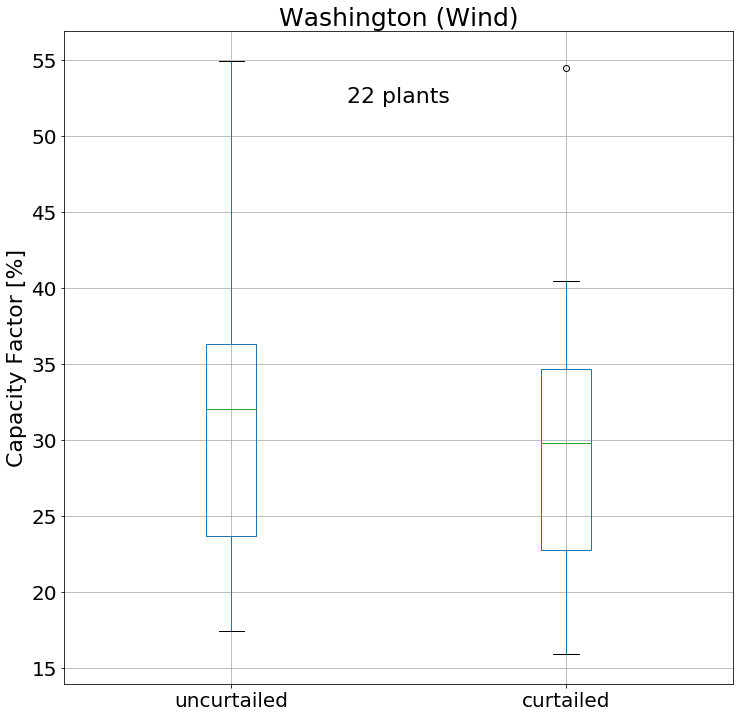

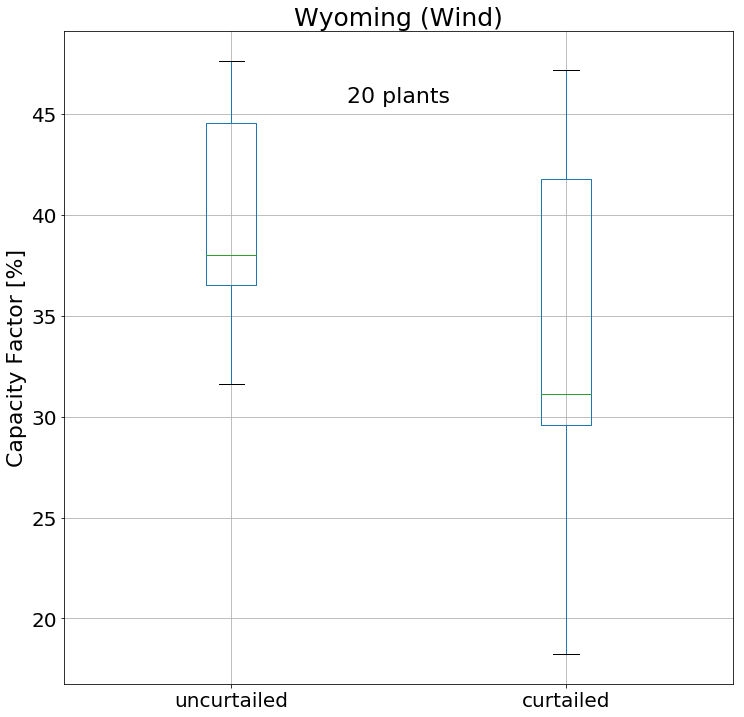

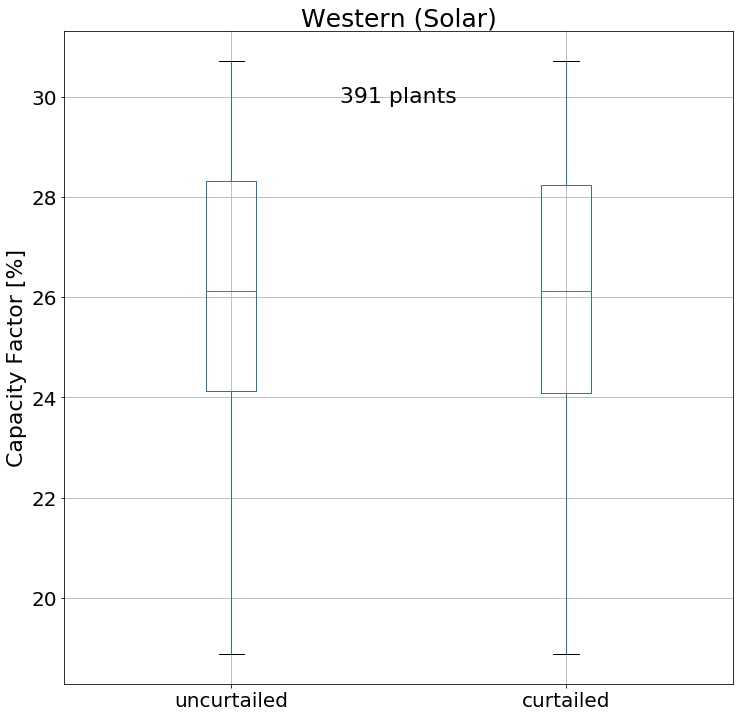

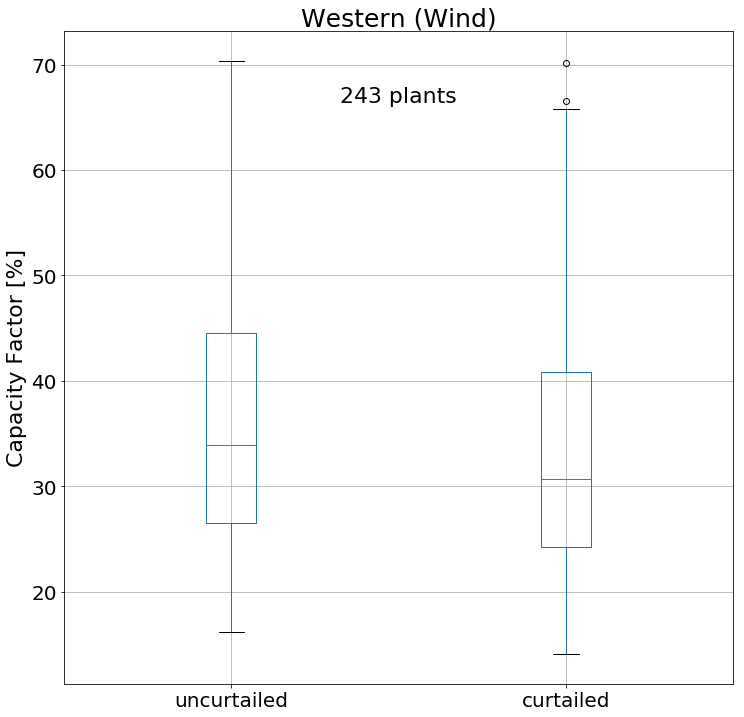

----------------------------------------
Capacity factor in Arizona: 
solar: 0.239 (pre-simulation) / 0.236 (post-simulation)
wind: 0.238 (pre-simulation) / 0.228 (post-simulation)
----------------------------------------
Capacity factor in California: 
solar: 0.261 (pre-simulation) / 0.261 (post-simulation)
wind: 0.470 (pre-simulation) / 0.439 (post-simulation)
----------------------------------------
Capacity factor in Colorado: 
solar: 0.241 (pre-simulation) / 0.241 (post-simulation)
wind: 0.319 (pre-simulation) / 0.303 (post-simulation)
----------------------------------------
Capacity factor in Idaho: 
solar: 0.279 (pre-simulation) / 0.279 (post-simulation)
wind: 0.217 (pre-simulation) / 0.207 (post-simulation)
----------------------------------------
Capacity factor in Montana Western: 
wind: 0.240 (pre-simulation) / 0.215 (post-simulation)
----------------------------------------
Capacity factor in Nevada: 
solar: 0.275 (pre-simulation) / 0.275 (post-simulation)
wind: 0.250 (pre

In [7]:
time = ('2016-07-21-00', '2016-07-31-23', 'utc', 'H')
zones = ['Arizona', 'California', 'Colorado', 'Idaho', 'Montana Western', 'Nevada',
         'New Mexico Western', 'Oregon', 'Utah', 'Washington', 'Wyoming', 'Western']
do_yield_analysis(scenario, time, zones)

## Fall

--> Loading PG
--> Loading demand
--> Loading solar
--> Loading wind
--> Loading hydro
No solar plants in Montana Western
No solar plants in Wyoming


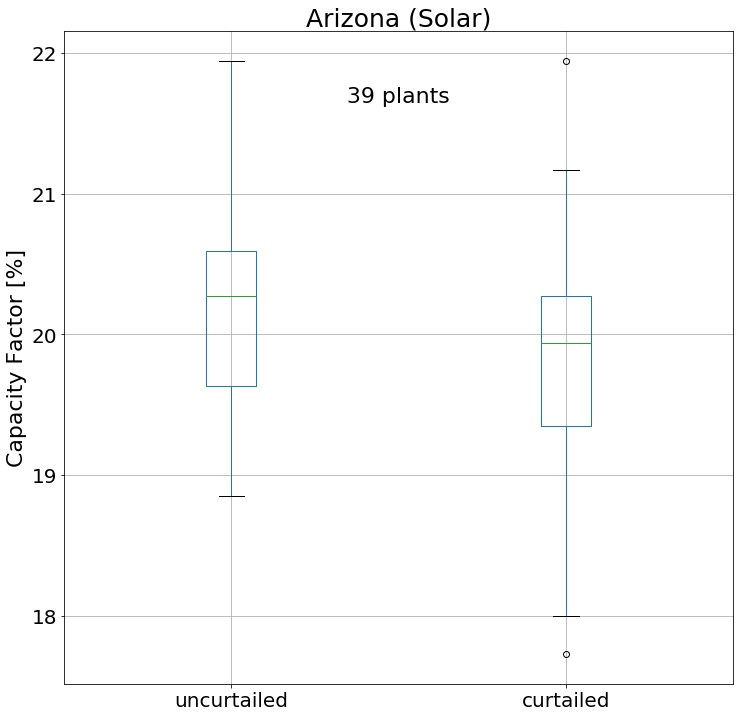

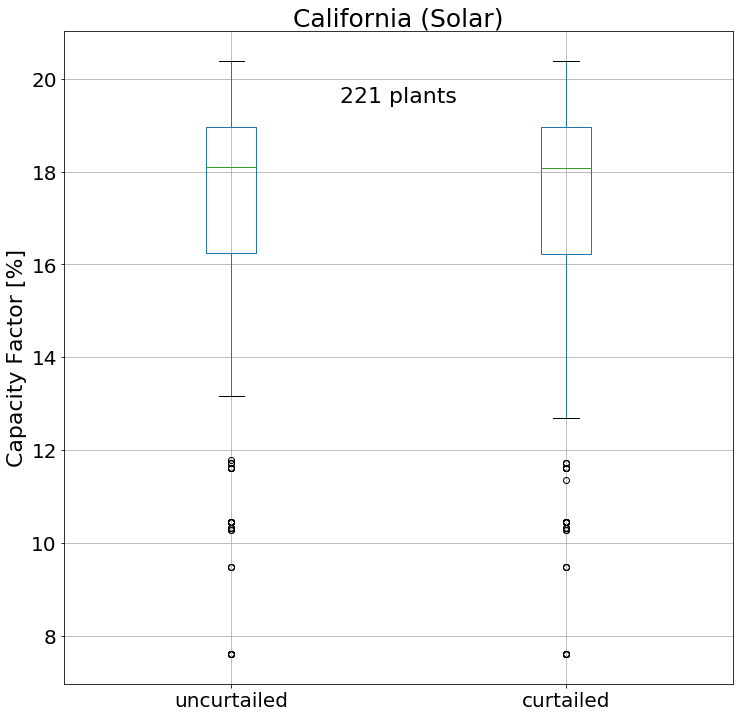

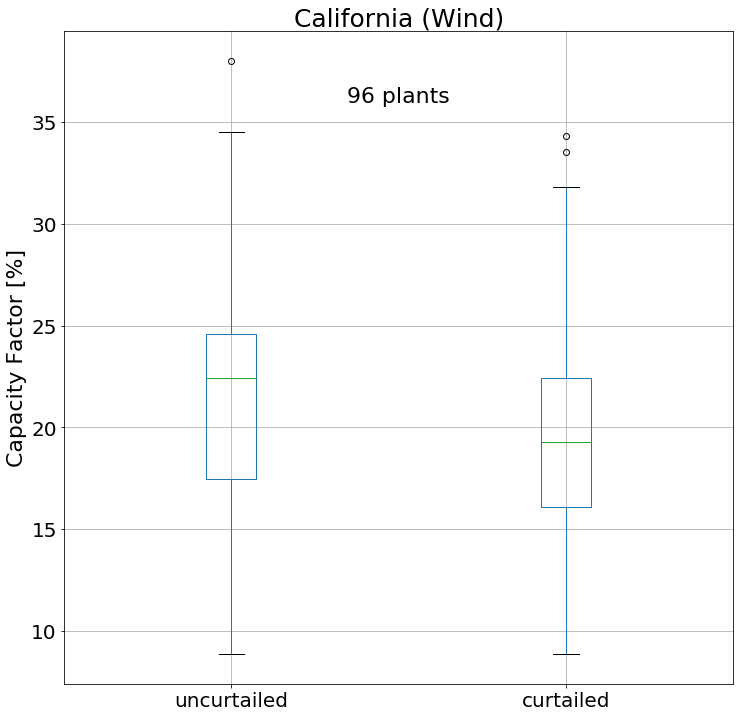

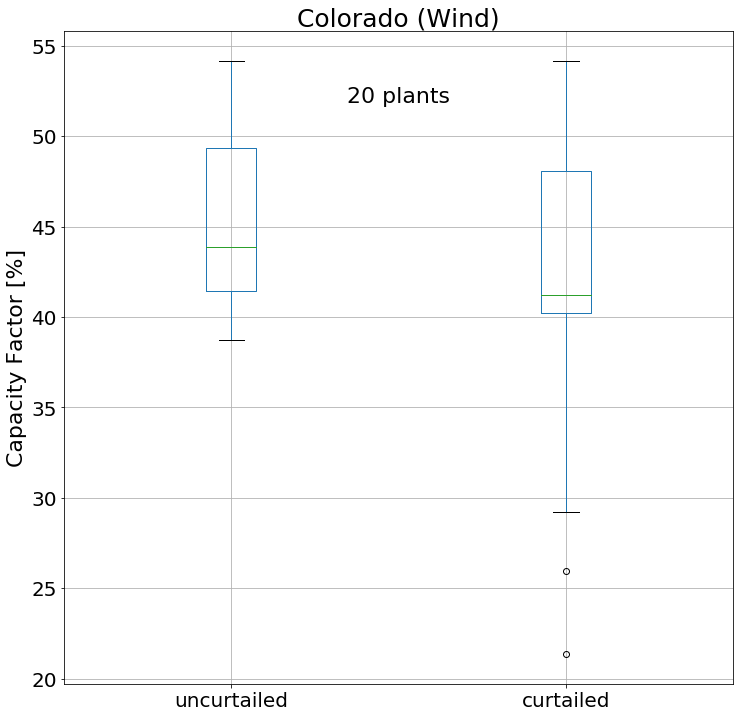

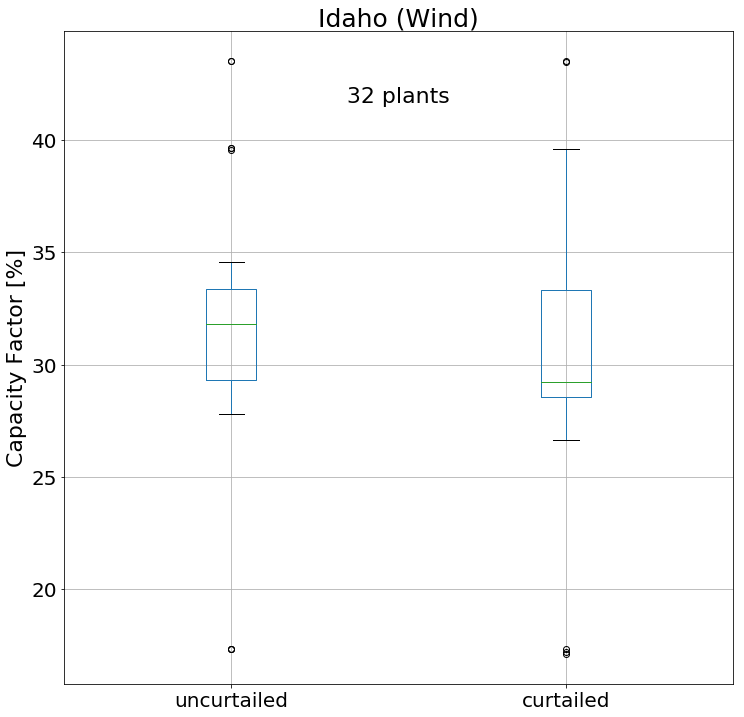

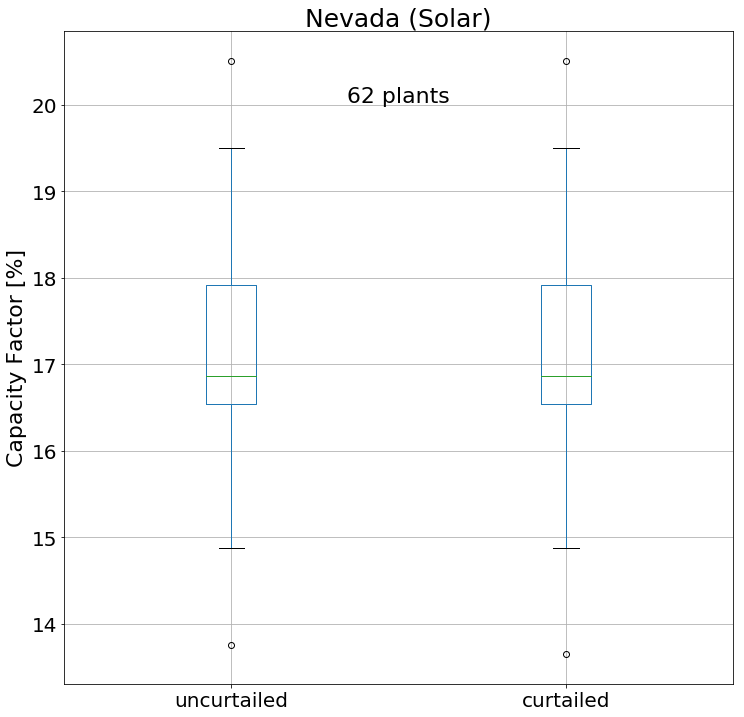

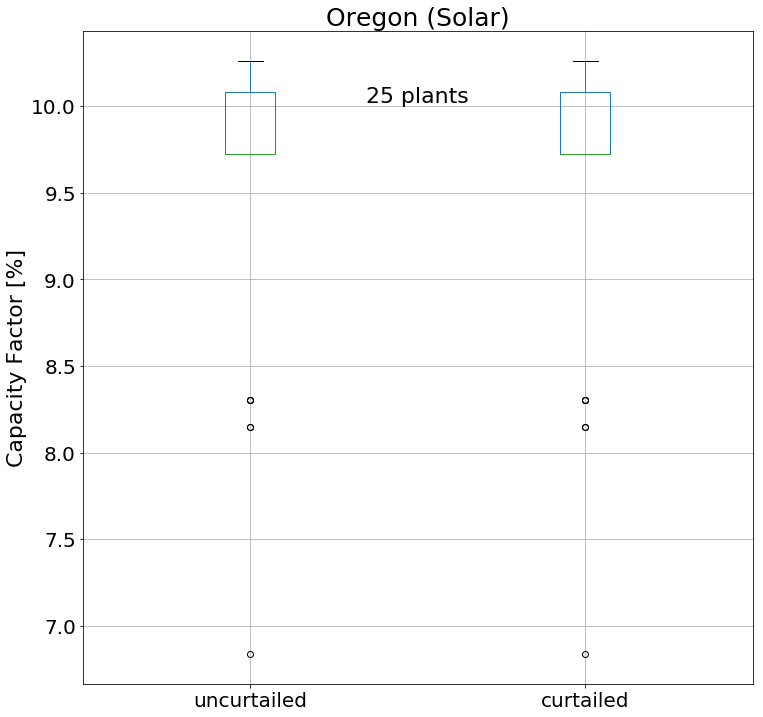

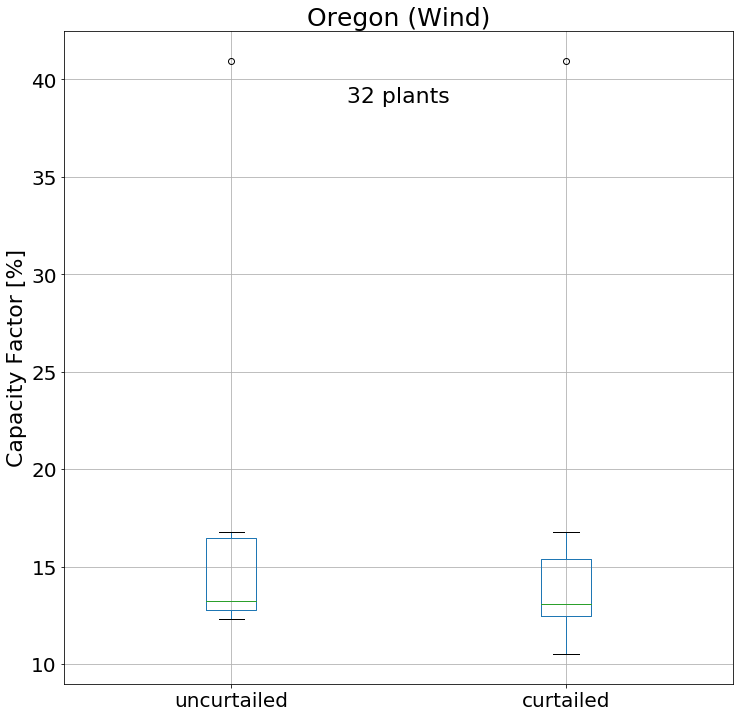

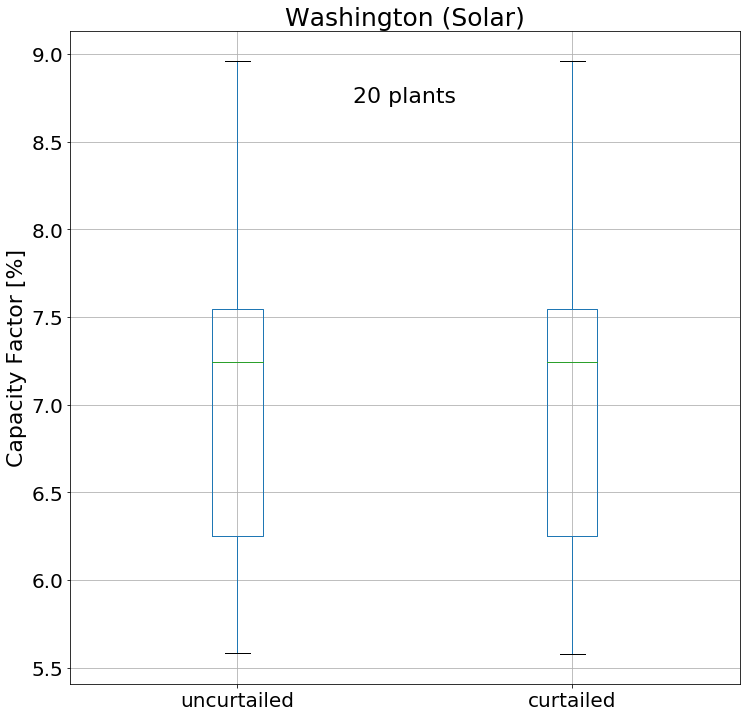

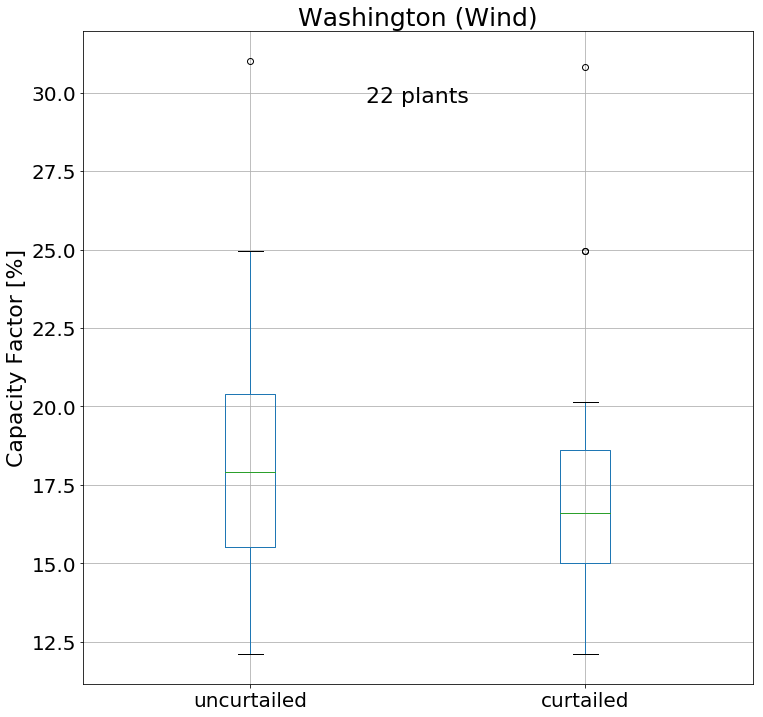

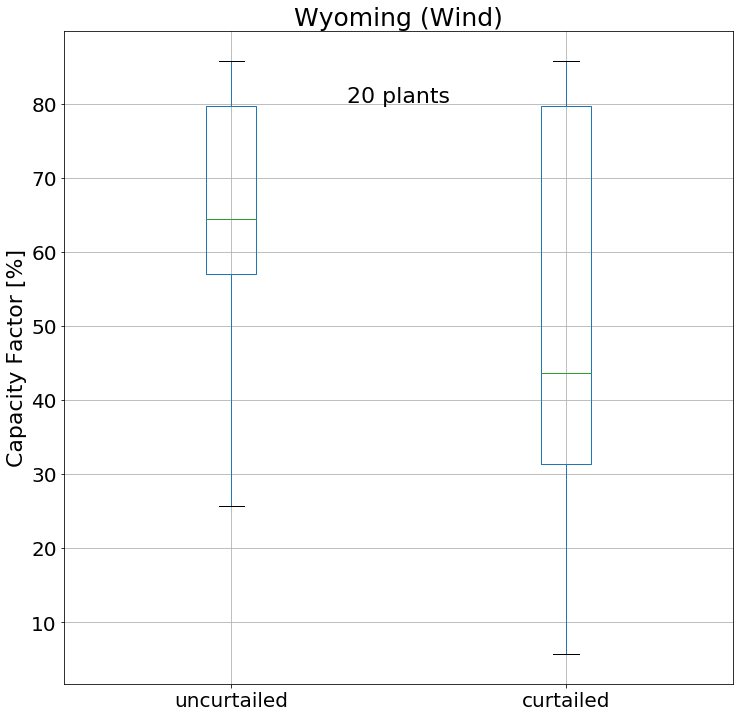

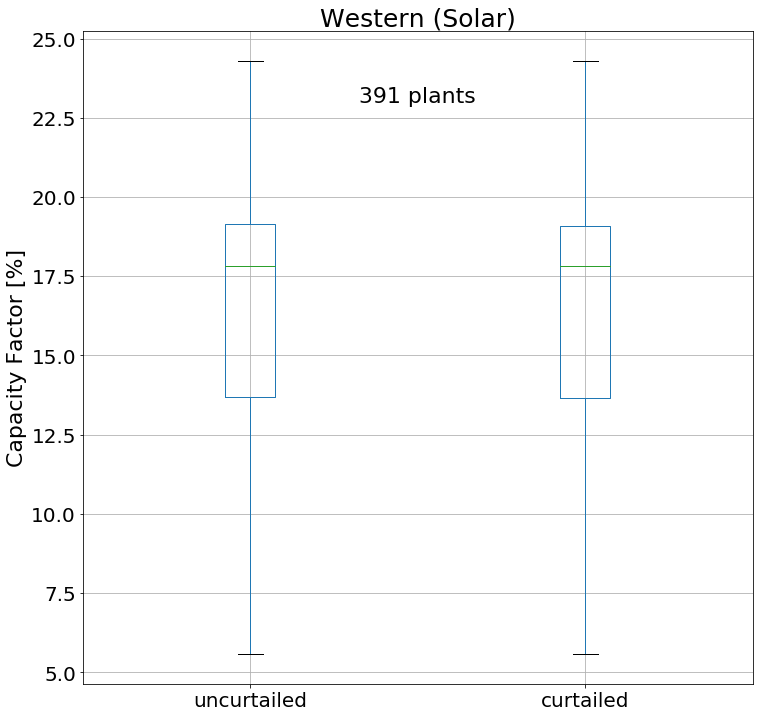

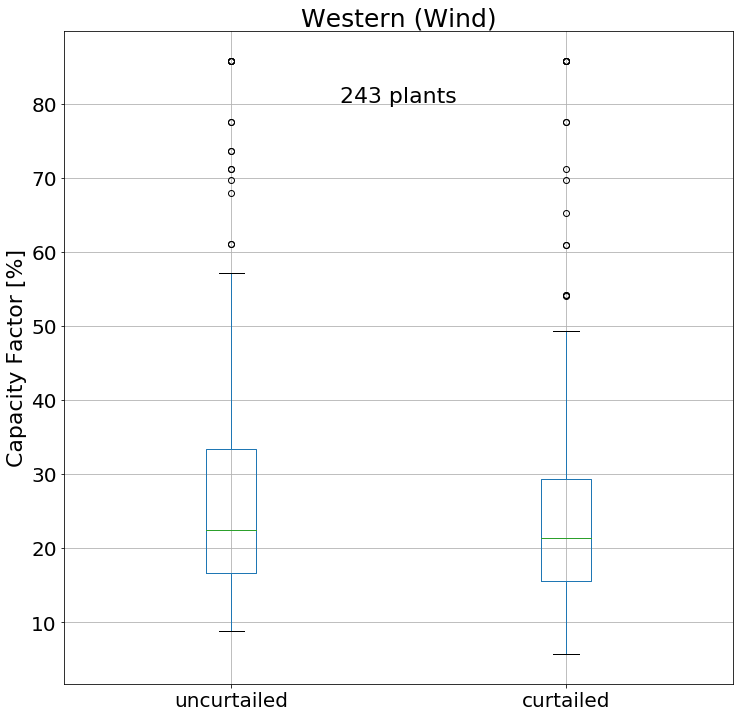

----------------------------------------
Capacity factor in Arizona: 
solar: 0.201 (pre-simulation) / 0.198 (post-simulation)
wind: 0.322 (pre-simulation) / 0.322 (post-simulation)
----------------------------------------
Capacity factor in California: 
solar: 0.168 (pre-simulation) / 0.168 (post-simulation)
wind: 0.200 (pre-simulation) / 0.195 (post-simulation)
----------------------------------------
Capacity factor in Colorado: 
solar: 0.229 (pre-simulation) / 0.229 (post-simulation)
wind: 0.455 (pre-simulation) / 0.415 (post-simulation)
----------------------------------------
Capacity factor in Idaho: 
solar: 0.092 (pre-simulation) / 0.092 (post-simulation)
wind: 0.314 (pre-simulation) / 0.305 (post-simulation)
----------------------------------------
Capacity factor in Montana Western: 
wind: 0.239 (pre-simulation) / 0.213 (post-simulation)
----------------------------------------
Capacity factor in Nevada: 
solar: 0.171 (pre-simulation) / 0.170 (post-simulation)
wind: 0.697 (pre

In [8]:
time = ('2016-10-21-00', '2016-10-31-23', 'utc', 'H')
zones = ['Arizona', 'California', 'Colorado', 'Idaho', 'Montana Western', 'Nevada',
         'New Mexico Western', 'Oregon', 'Utah', 'Washington', 'Wyoming', 'Western']
do_yield_analysis(scenario, time, zones)